# MACHINE LEARNING MODEL

In [4]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Load data

In [5]:
# Root folder containing the folders with the .npy files
carpeta_raiz='C:/Users/FelipeMartin/OneDrive - University of Sussex/DISSERTATION/segundo intento'
# Pattern to search for .parquet files in all subfolders                      
patron = '**/*.parquet'

# Get list of .parquet files matching the pattern
archivos = glob.glob(os.path.join(carpeta_raiz, patron), recursive=True)

archivos

['C:/Users/FelipeMartin/OneDrive - University of Sussex/DISSERTATION/segundo intento\\12155577\\boutons\\SS066-2016-09-01-001.parquet',
 'C:/Users/FelipeMartin/OneDrive - University of Sussex/DISSERTATION/segundo intento\\12155577\\boutons\\SS069-2016-10-11-001.parquet',
 'C:/Users/FelipeMartin/OneDrive - University of Sussex/DISSERTATION/segundo intento\\12155577\\boutons\\SS069-2016-10-13-001.parquet',
 'C:/Users/FelipeMartin/OneDrive - University of Sussex/DISSERTATION/segundo intento\\12155577\\boutons\\SS070-2016-10-18-001.parquet',
 'C:/Users/FelipeMartin/OneDrive - University of Sussex/DISSERTATION/segundo intento\\12155577\\boutons\\SS071-2016-10-18-001.parquet',
 'C:/Users/FelipeMartin/OneDrive - University of Sussex/DISSERTATION/segundo intento\\12155577\\boutons\\SS075-2017-09-13-001.parquet',
 'C:/Users/FelipeMartin/OneDrive - University of Sussex/DISSERTATION/segundo intento\\12155577\\boutons\\SS075-2017-09-27-001.parquet',
 'C:/Users/FelipeMartin/OneDrive - University of

In [6]:
from fastparquet import ParquetFile

# Create a list to store the DataFrames
# Extract the last three folders
def obtener_ultimas_carpetas(ruta):
    carpetas = ruta.split('/')
    return '/'.join(carpetas[-3:])

dataframes = []
for archivo in archivos:
    nombre = os.path.splitext(os.path.basename(archivo))[0]
    carpetas = os.path.dirname(archivo).split(os.sep)[-3:]
    folder_name = '-'.join(carpetas) 
    data = pd.read_parquet(archivo, engine='fastparquet')
    
    data = data[data['in_interval']==True]
    
    data['experiment'] = data['folder_name_x'].apply(obtener_ultimas_carpetas)
    data = data.drop(['folder_nROW','start','end','value_type','folder_name_x','speed','tamaño_pupila','n_interval','interval_ID_3','gratingID_3'
                     ,'interval_ID_enum_2'], axis=1)
    dataframes.append(data)  

# Concatenate the DataFrames into a single DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)


In [7]:
experiments = [
    "SS038/2015-02-17/001",
    "SS041/2015-04-23/001",
    "SS044/2015-04-28/001",
    "SS044/2015-05-29/001",
    "SS045/2015-05-04/001",
    "SS045/2015-05-05/001",
    "SS047/2015-11-23/001",
    "SS047/2015-12-03/001",
    "SS048/2015-11-09/001",
    "SS048/2015-12-02/001",
    "SS066/2016-09-01/001",
    "SS069/2016-10-11/001",
    "SS069/2016-10-13/001",
    "SS070/2016-10-18/001",
    "SS071/2016-10-18/001",
    "SS075/2017-09-13/001",
    "SS075/2017-09-27/001",
    "SS076/2017-10-04/001",
    "SS077/2017-10-03/001",
    "SS077/2017-10-05/001",
    "SS078/2017-09-28/001",
    "SS078/2017-10-04/001",
    "SS078/2017-10-05/001"
]

experiment_dict = {f"experiment {i+1}": exp for i, exp in enumerate(experiments)}
# Create an inverted dictionary to do the matching
inverse_dict = {v: k for k, v in experiment_dict.items()}

inverse_dict

{'SS038/2015-02-17/001': 'experiment 1',
 'SS041/2015-04-23/001': 'experiment 2',
 'SS044/2015-04-28/001': 'experiment 3',
 'SS044/2015-05-29/001': 'experiment 4',
 'SS045/2015-05-04/001': 'experiment 5',
 'SS045/2015-05-05/001': 'experiment 6',
 'SS047/2015-11-23/001': 'experiment 7',
 'SS047/2015-12-03/001': 'experiment 8',
 'SS048/2015-11-09/001': 'experiment 9',
 'SS048/2015-12-02/001': 'experiment 10',
 'SS066/2016-09-01/001': 'experiment 11',
 'SS069/2016-10-11/001': 'experiment 12',
 'SS069/2016-10-13/001': 'experiment 13',
 'SS070/2016-10-18/001': 'experiment 14',
 'SS071/2016-10-18/001': 'experiment 15',
 'SS075/2017-09-13/001': 'experiment 16',
 'SS075/2017-09-27/001': 'experiment 17',
 'SS076/2017-10-04/001': 'experiment 18',
 'SS077/2017-10-03/001': 'experiment 19',
 'SS077/2017-10-05/001': 'experiment 20',
 'SS078/2017-09-28/001': 'experiment 21',
 'SS078/2017-10-04/001': 'experiment 22',
 'SS078/2017-10-05/001': 'experiment 23'}

In [8]:
# Create the mapping dictionary
mapping = {1: '0°', 2: '30°', 3: '60°', 4: '90°', 5: '120°', 6: '150°', 7: '180°',
           8: '210°', 9: '240°', 10: '270°', 11: '300°', 12: '330°', 13: 'NaN'}


In [9]:
merged_df

,nROIs,dff,nROW_x,timestamps,in_interval,gratingID,interval_ID,largePupil,interval_ID_enum,gratingValue,pupil_size_category,speed_category,experiment
0,0,0.257494,546,76.426,True,5.0,1.0,1.0,1.0,120°,Large pupil,No Running,SS066/2016-09-01/001
1,0,0.138850,547,76.564,True,5.0,1.0,1.0,2.0,120°,Large pupil,No Running,SS066/2016-09-01/001
2,0,0.237484,548,76.701,True,5.0,1.0,1.0,3.0,120°,Large pupil,No Running,SS066/2016-09-01/001
3,0,0.318161,549,76.838,True,5.0,1.0,1.0,4.0,120°,Large pupil,No Running,SS066/2016-09-01/001
4,0,0.247226,550,76.976,True,5.0,1.0,1.0,5.0,120°,Large pupil,No Running,SS066/2016-09-01/001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18678274,291,0.075388,8993,1201.292,True,9.0,195.0,1.0,11.0,240°,Large pupil,Running,SS048/2015-12-02/001
18678275,291,0.139707,8994,1201.426,True,9.0,195.0,1.0,12.0,240°,Large pupil,Running,SS048/2015-12-02/001
18678276,291,0.059123,8995,1201.559,True,9.0,195.0,1.0,13.0,240°,Large pupil,Running,SS048/2015-12-02/001
18678277,291,0.264260,8996,1201.693,True,9.0,195.0,1.0,14.0,240°,Large pupil,Running,SS048/2015-12-02/001


## Next, we obtain the different parameters and then correlate them with the accuracy of the model.

### Number of neurons per experiment

In [47]:
neuronas_por_experimento = merged_df.groupby('experiment')['nROIs'].nunique().reset_index()
# add id_experiment
neuronas_por_experimento['experiment_id'] = neuronas_por_experimento['experiment'].map(inverse_dict)
neuronas_por_experimento=neuronas_por_experimento.rename(columns={"nROIs": "Number_of_neurons"})

neuronas_por_experimento

,experiment,Number_of_neurons,experiment_id
0,SS038/2015-02-17/001,251,experiment 1
1,SS041/2015-04-23/001,383,experiment 2
2,SS044/2015-04-28/001,546,experiment 3
3,SS044/2015-05-29/001,383,experiment 4
4,SS045/2015-05-04/001,341,experiment 5
5,SS045/2015-05-05/001,406,experiment 6
6,SS047/2015-11-23/001,508,experiment 7
7,SS047/2015-12-03/001,386,experiment 8
8,SS048/2015-11-09/001,233,experiment 9
9,SS048/2015-12-02/001,292,experiment 10


### Number of records per experiment

In [48]:
records_by_experiment = merged_df[merged_df['in_interval']==True][merged_df['nROIs']==0].groupby(['experiment'])['dff'].count().reset_index()
records_by_experiment['experiment_id'] = records_by_experiment['experiment'].map(inverse_dict)
records_by_experiment=records_by_experiment.rename(columns={"dff": "records_by_experiment"})

In [49]:
records_by_experiment

,experiment,records_by_experiment,experiment_id
0,SS038/2015-02-17/001,3993,experiment 1
1,SS041/2015-04-23/001,2359,experiment 2
2,SS044/2015-04-28/001,2357,experiment 3
3,SS044/2015-05-29/001,1964,experiment 4
4,SS045/2015-05-04/001,2955,experiment 5
5,SS045/2015-05-05/001,2953,experiment 6
6,SS047/2015-11-23/001,2947,experiment 7
7,SS047/2015-12-03/001,2951,experiment 8
8,SS048/2015-11-09/001,2946,experiment 9
9,SS048/2015-12-02/001,2950,experiment 10


### Number of recordings per experiment per neuron

In [50]:
records_by_experiment_by_neuron = merged_df[merged_df['in_interval']==True].groupby(['experiment'])['dff'].count().reset_index()
records_by_experiment_by_neuron['experiment_id'] = records_by_experiment_by_neuron['experiment'].map(inverse_dict)
records_by_experiment_by_neuron=records_by_experiment_by_neuron.rename(columns={"dff": "records_by_experiment_by_neuron"})

In [51]:
records_by_experiment_by_neuron

,experiment,records_by_experiment_by_neuron,experiment_id
0,SS038/2015-02-17/001,1002243,experiment 1
1,SS041/2015-04-23/001,903497,experiment 2
2,SS044/2015-04-28/001,1286922,experiment 3
3,SS044/2015-05-29/001,752212,experiment 4
4,SS045/2015-05-04/001,1007655,experiment 5
5,SS045/2015-05-05/001,1198918,experiment 6
6,SS047/2015-11-23/001,1497076,experiment 7
7,SS047/2015-12-03/001,1139086,experiment 8
8,SS048/2015-11-09/001,686418,experiment 9
9,SS048/2015-12-02/001,861400,experiment 10


# Analysis of selectivity per neuron

In [11]:
#Neuron selectivity analysis

#Step 1: # Calculate the z-score for the column 'dff'.
#Calculate the mean and standard deviation for each neuron #Step 2: #Calculate the mean and standard deviation for each neuron
mean_by_neuron = merged_df[merged_df['in_interval']==True].groupby(['experiment', 'nROIs'])['dff'].mean()
std_by_neuron = merged_df[merged_df['in_interval']==True].groupby(['experiment', 'nROIs'])['dff'].std()

# Function to apply Z-score to each neuron's values
def z_score(row):
    neuron_mean = mean_by_neuron[row['nROIs']]
    neuron_std = std_by_neuron[row['nROIs']]
    return (row['dff'] - neuron_mean) / neuron_std

# Apply the Z-score to the 'dff' column 
merged_df['z_score_dff'] = merged_df[merged_df['in_interval']==True].apply(z_score, axis=1)

grouped = merged_df.groupby(['experiment', 'nROIs',  'gratingID','gratingValue'])

result = grouped['z_score_dff'].mean()

# Calculate the standard error of the mean
sem = grouped['z_score_dff'].sem()

# Create a DataFrame with the results
result = pd.DataFrame(result)
result['sem'] = sem
result = result.reset_index()


In [12]:
# Suponiendo que df2 es tu DataFrame
result['experiment_id'] = result['experiment'].map(inverse_dict)


In [13]:
result[result['experiment']=='SS038/2015-02-17/001'][result['nROIs']==0]

C:\Users\FelipeMartin\AppData\Local\Temp\ipykernel_17036\3725676043.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result[result['experiment']=='SS038/2015-02-17/001'][result['nROIs']==0]


,experiment,nROIs,gratingID,gratingValue,z_score_dff,sem,experiment_id
0,SS038/2015-02-17/001,0,1.0,0°,-0.246072,0.044367,experiment 1
1,SS038/2015-02-17/001,0,2.0,30°,-0.147521,0.044736,experiment 1
2,SS038/2015-02-17/001,0,3.0,60°,0.497391,0.054378,experiment 1
3,SS038/2015-02-17/001,0,4.0,90°,0.476009,0.059900,experiment 1
4,SS038/2015-02-17/001,0,5.0,120°,0.880404,0.064736,experiment 1
5,SS038/2015-02-17/001,0,6.0,150°,-0.360319,0.038484,experiment 1
6,SS038/2015-02-17/001,0,7.0,180°,-0.615052,0.033122,experiment 1
7,SS038/2015-02-17/001,0,8.0,210°,0.227496,0.052392,experiment 1
8,SS038/2015-02-17/001,0,9.0,240°,0.703028,0.047884,experiment 1
9,SS038/2015-02-17/001,0,10.0,270°,0.415257,0.054232,experiment 1


In [14]:
# Group by experiment and nRois, then calculate the minimum and maximum of z_score_dff
grouped_max_min = result.groupby(['experiment', 'nROIs'])['z_score_dff'].agg(['min', 'max']).reset_index()

grouped_max_min['DSI']=  ( grouped_max_min['max'] - grouped_max_min['min'] ) / (grouped_max_min['max']  )

In [15]:
grouped_max_min['experiment_id'] = grouped_max_min['experiment'].map(inverse_dict)

In [16]:
grouped_max_min

,experiment,nROIs,min,max,DSI,experiment_id
0,SS038/2015-02-17/001,0,-1.159788,0.880404,2.317336,experiment 1
1,SS038/2015-02-17/001,1,-0.503921,0.398678,2.263980,experiment 1
2,SS038/2015-02-17/001,2,-0.587428,0.464178,2.265523,experiment 1
3,SS038/2015-02-17/001,3,-0.322229,0.406031,1.793608,experiment 1
4,SS038/2015-02-17/001,4,-0.265148,1.573505,1.168508,experiment 1
...,...,...,...,...,...,...
6346,SS078/2017-10-05/001,233,-0.610631,-0.284039,-1.149814,experiment 23
6347,SS078/2017-10-05/001,234,-0.641692,-0.213696,-2.002821,experiment 23
6348,SS078/2017-10-05/001,235,-0.367457,-0.006274,-57.569548,experiment 23
6349,SS078/2017-10-05/001,236,-0.457683,-0.420618,-0.088121,experiment 23


 ## Obtain average DSI per experiment

In [17]:
avg_DSI = grouped_max_min[grouped_max_min['DSI']<10][grouped_max_min['DSI']>-10].groupby(['experiment'])['DSI'].agg(['mean', 'std']).reset_index()

C:\Users\FelipeMartin\AppData\Local\Temp\ipykernel_17036\3996092188.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_DSI = grouped_max_min[grouped_max_min['DSI']<10][grouped_max_min['DSI']>-10].groupby(['experiment'])['DSI'].agg(['mean', 'std']).reset_index()


In [18]:
avg_DSI['experiment_id'] = avg_DSI['experiment'].map(inverse_dict)
avg_DSI=avg_DSI.rename(columns={"mean": "mean_DSI","std":"std_DSI"})

In [19]:
avg_DSI

,experiment,mean_DSI,std_DSI,experiment_id
0,SS038/2015-02-17/001,1.742658,0.369106,experiment 1
1,SS041/2015-04-23/001,0.648338,1.433412,experiment 2
2,SS044/2015-04-28/001,0.630807,1.694397,experiment 3
3,SS044/2015-05-29/001,0.575952,1.544647,experiment 4
4,SS045/2015-05-04/001,0.581211,1.424674,experiment 5
5,SS045/2015-05-05/001,0.592872,1.553485,experiment 6
6,SS047/2015-11-23/001,0.601690,1.503038,experiment 7
7,SS047/2015-12-03/001,0.760276,1.282521,experiment 8
8,SS048/2015-11-09/001,0.619329,1.042690,experiment 9
9,SS048/2015-12-02/001,0.613957,1.448941,experiment 10


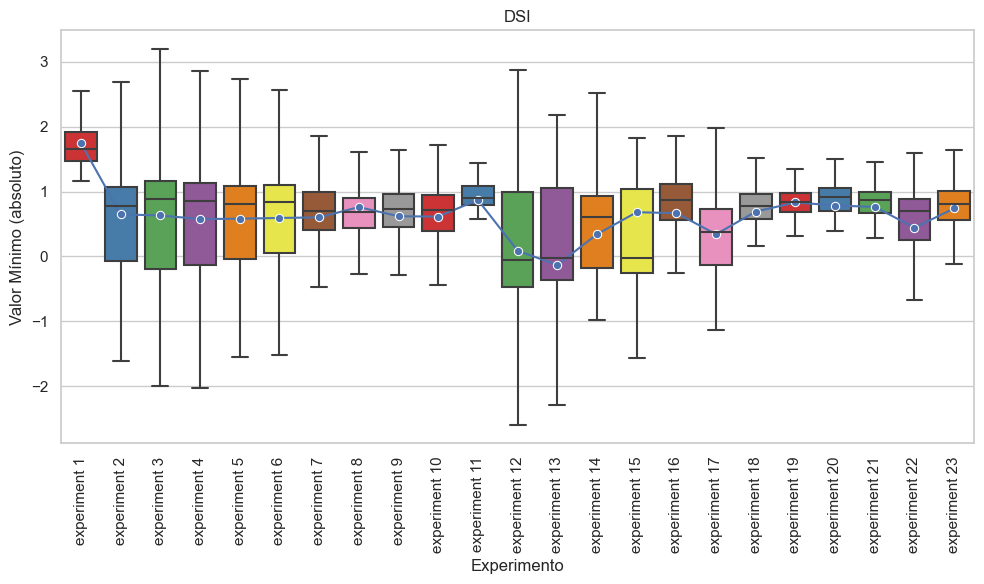

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=grouped_max_min, x='experiment_id', y='DSI', palette='Set1', showfliers=False)
sns.lineplot(x='experiment', y='mean_DSI', data=avg_DSI, marker='o')
plt.title("DSI")
plt.xlabel("Experimento")
plt.ylabel("Valor Mínimo (absoluto)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Standard deviation per neuron of the average dff values of the direction tuning curve

In [21]:
std_direction_tuning_curve = result.groupby(['experiment', 'nROIs']).z_score_dff.std().reset_index()

In [22]:
std_direction_tuning_curve['experiment_id'] = std_direction_tuning_curve['experiment'].map(inverse_dict)

In [23]:
std_direction_tuning_curve

,experiment,nROIs,z_score_dff,experiment_id
0,SS038/2015-02-17/001,0,0.602005,experiment 1
1,SS038/2015-02-17/001,1,0.259749,experiment 1
2,SS038/2015-02-17/001,2,0.355064,experiment 1
3,SS038/2015-02-17/001,3,0.220575,experiment 1
4,SS038/2015-02-17/001,4,0.477132,experiment 1
...,...,...,...,...
6346,SS078/2017-10-05/001,233,0.100720,experiment 23
6347,SS078/2017-10-05/001,234,0.141534,experiment 23
6348,SS078/2017-10-05/001,235,0.113893,experiment 23
6349,SS078/2017-10-05/001,236,0.010135,experiment 23


In [26]:
avg_by_std_direction_tuning_curve = std_direction_tuning_curve.groupby(['experiment','experiment_id']).z_score_dff.mean().reset_index()
avg_by_std_direction_tuning_curve=avg_by_std_direction_tuning_curve.rename(columns={"z_score_dff": "mean_std_DTC"})
avg_by_std_direction_tuning_curve

,experiment,experiment_id,mean_std_DTC
0,SS038/2015-02-17/001,experiment 1,0.422256
1,SS041/2015-04-23/001,experiment 2,1.955097
2,SS044/2015-04-28/001,experiment 3,1.050813
3,SS044/2015-05-29/001,experiment 4,2.218144
4,SS045/2015-05-04/001,experiment 5,1.808471
5,SS045/2015-05-05/001,experiment 6,4.226894
6,SS047/2015-11-23/001,experiment 7,1.004833
7,SS047/2015-12-03/001,experiment 8,2.361659
8,SS048/2015-11-09/001,experiment 9,2.560527
9,SS048/2015-12-02/001,experiment 10,1.837016


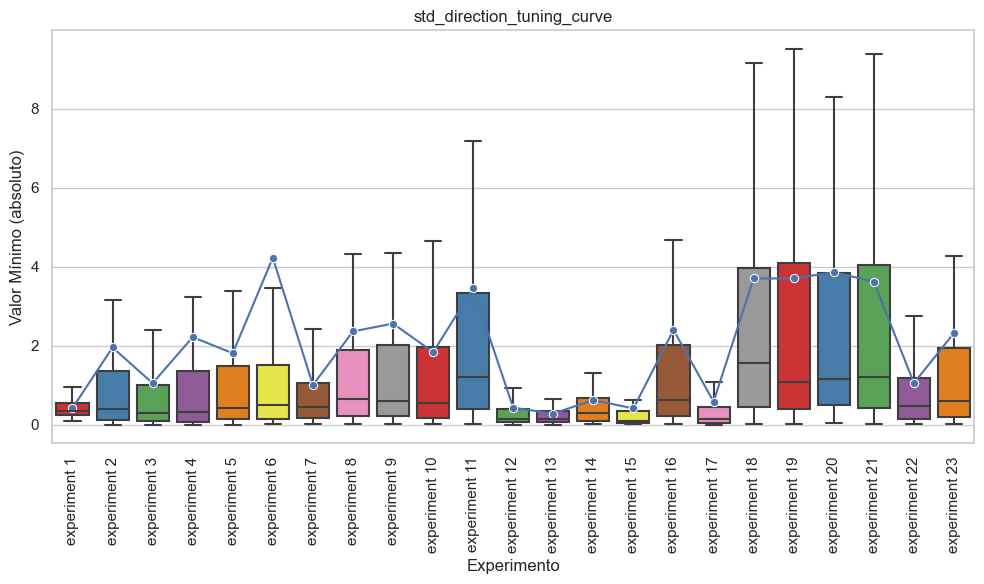

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=std_direction_tuning_curve, x='experiment_id', y='z_score_dff', palette='Set1', showfliers=False)
sns.lineplot(x='experiment', y='mean_std_DTC', data=avg_by_std_direction_tuning_curve, marker='o')
plt.title("std_direction_tuning_curve")
plt.xlabel("Experimento")
plt.ylabel("Valor Mínimo (absoluto)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# We load the data for each experiment

In [23]:
data_exp_1  = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS038/2015-02-17/001']
data_exp_2  = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS041/2015-04-23/001']
data_exp_3  = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS044/2015-04-28/001']
data_exp_4  = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS044/2015-05-29/001']
data_exp_5  = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS045/2015-05-04/001']
data_exp_6  = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS045/2015-05-05/001']
data_exp_7  = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS047/2015-11-23/001']
data_exp_8  = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS047/2015-12-03/001']
data_exp_9  = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS048/2015-11-09/001']
data_exp_10 = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS048/2015-12-02/001']

data_exp_11 = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS066/2016-09-01/001']
data_exp_12 = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS069/2016-10-11/001']
data_exp_13 = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS069/2016-10-13/001']
data_exp_14 = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS070/2016-10-18/001']
data_exp_15 = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS071/2016-10-18/001']
data_exp_16 = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS075/2017-09-13/001']
data_exp_17 = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS075/2017-09-27/001']
data_exp_18 = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS076/2017-10-04/001']
data_exp_19 = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS077/2017-10-03/001']
data_exp_20 = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS077/2017-10-05/001']
data_exp_21 = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS078/2017-09-28/001']
data_exp_22 = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS078/2017-10-04/001']
data_exp_23 = merged_df[merged_df['in_interval']==True][merged_df['experiment']=='SS078/2017-10-05/001']


In [24]:
dataframes=[data_exp_1, data_exp_2, data_exp_3, data_exp_4, data_exp_5, data_exp_6, data_exp_7, data_exp_8, data_exp_9, data_exp_10, data_exp_11, data_exp_12, data_exp_13, data_exp_14, data_exp_15, data_exp_16, data_exp_17, data_exp_18, data_exp_19, data_exp_20, data_exp_21, data_exp_22, data_exp_23]

## Metrics value

In [10]:
#Create a function to plot the confusion matrix for model evaluation
mapping = {1: '0°', 2: '30°', 3: '60°', 4: '90°', 5: '120°', 6: '150°', 7: '180°',
           8: '210°', 9: '240°', 10: '270°', 11: '300°', 12: '330°', 13: 'NaN'}

def plot_confusion_matrix(model,X_test,y_test,title='',is_ml=False, labels={}):
    
  ticks = list(map(lambda x : mapping[x], np.unique(y_test).tolist())) if labels=={} else labels.values()
  preds = model.predict(X_test)
  pred_cat = preds if is_ml else np.argmax(preds,axis=1)
  print('model accuracy on test set is: {0:.2f}%'.format(accuracy_score(y_test,pred_cat)*100))
  plt.figure(figsize=(15,8),dpi=120)
  sns.heatmap(confusion_matrix(y_test,pred_cat),cmap='Blues',annot=True, fmt='d',xticklabels=ticks,yticklabels=ticks)
  plt.xlabel('Prediction')
  plt.ylabel('True label')
  plt.title(title)
  plt.show()

# Machine Learning Model (SVM)

## Tuning hyperparameters

SS066/2016-09-01/001
SS069/2016-10-11/001
SS069/2016-10-13/001
SS070/2016-10-18/001
SS071/2016-10-18/001
SS075/2017-09-13/001
SS075/2017-09-27/001
SS076/2017-10-04/001
SS077/2017-10-03/001
SS077/2017-10-05/001
SS078/2017-09-28/001
SS078/2017-10-04/001
SS078/2017-10-05/001
SS038/2015-02-17/001
SS041/2015-04-23/001
SS044/2015-04-28/001
SS044/2015-05-29/001
SS045/2015-05-04/001
SS045/2015-05-05/001
SS047/2015-11-23/001
SS047/2015-12-03/001
SS048/2015-11-09/001
SS048/2015-12-02/001


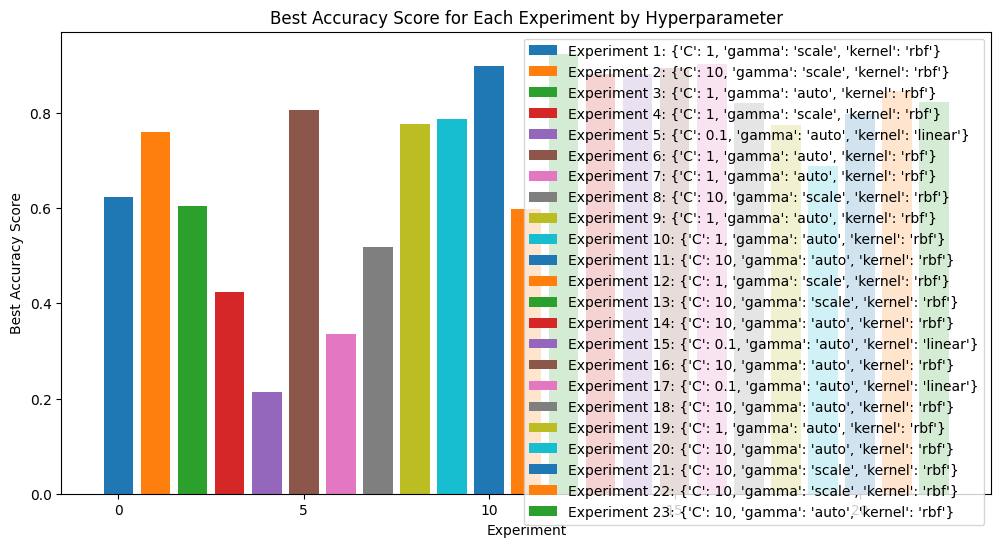

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC

scaler = StandardScaler()
best_params_results = []
# Hyperparameters to be set

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['auto', 'scale', 0.1, 1, 10]
}

# Processing for each experiment
for data_exp in dataframes:
    experiment_name = data_exp['experiment'].unique()[0]
    print(experiment_name)

    features_exp = data_exp.pivot(index='nROW_x', columns='nROIs', values='dff')
    features_exp = features_exp.reset_index().drop(['nROW_x'], axis=1)

    dimf_exp = features_exp.shape[1]
    class_exp = data_exp[data_exp['nROIs'] == 0]['gratingID']
    class_exp = class_exp.reset_index()

    features_exp = features_exp.rename(columns={i: 'ROI' + str(i) for i in range(0, dimf_exp)})
    df_full = pd.merge(features_exp, class_exp, left_index=True, right_index=True).dropna()

    X = df_full[['ROI' + str(i) for i in range(0, dimf_exp)]].to_numpy()
    y = df_full['gratingID'].to_numpy()

    X = scaler.fit_transform(X)  # Normalizar

     # Create GridSearchCV object with parallelisation
    grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    # Perform grid search
    grid_search.fit(X, y)

    # Obtain the best set of hyperparameters and their score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Store the best parameters and their score
    best_params_results.append({
        'experiment_name': experiment_name,
        'best_params': best_params,
        'best_score': best_score
    })
# Convert to DataFrames
best_params_df = pd.DataFrame(best_params_results)

# Graphing the results
plt.figure(figsize=(12, 6))

for i, row in enumerate(best_params_results):
    plt.bar(i, row['best_score'], label=f"Experiment {i+1}: {row['best_params']}")

plt.xlabel('Experiment')
plt.ylabel('Best Accuracy Score')
plt.title('Best Accuracy Score for Each Experiment by Hyperparameter')
plt.legend()
plt.show()

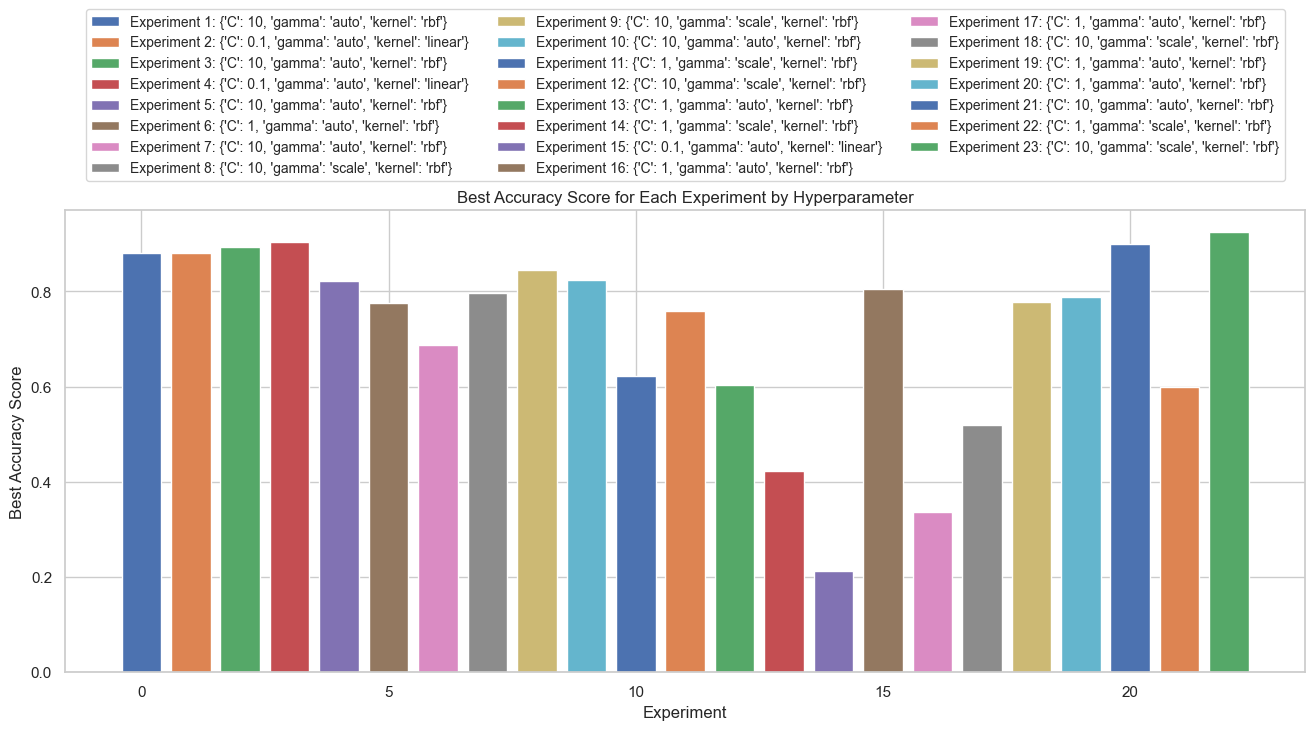

In [137]:
# Graphing the results
plt.figure(figsize=(16, 6))

for i, row in enumerate(best_params_results):
    plt.bar(i, row['best_score'], label=f"Experiment {i+1}: {row['best_params']}")

plt.xlabel('Experiment')
plt.ylabel('Best Accuracy Score')
plt.title('Best Accuracy Score for Each Experiment by Hyperparameter')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.45), numpoints=2,ncol=len(merged_df['experiment'].unique())/6, fontsize=10)

plt.show()

# ALL DATA MODEL ( AROUSAL + NON AROUSAL)

In [25]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

scaler = StandardScaler()
metric_results = []

for data_exp in dataframes:
    experiment_name = data_exp['experiment'].unique()[0]
    print(experiment_name)

    # Get the best hyperparameters for this experiment from best_params_df
    best_params = best_params_df[best_params_df['experiment_name'] == experiment_name]['best_params'].iloc[0]
    
    data_exp = data_exp
    features_exp = data_exp.pivot(index='nROW_x', columns='nROIs', values='dff')
    features_exp = features_exp.reset_index().drop(['nROW_x'], axis=1)
    
    dimf_exp = features_exp.shape[1]
    class_exp = data_exp[data_exp['nROIs'] == 0]['gratingID']
    class_exp = class_exp.reset_index()
    features_exp = features_exp.rename(columns={i: 'ROI' + str(i) for i in range(0, dimf_exp)})
    
    df_full = pd.merge(features_exp, class_exp, left_index=True, right_index=True).dropna()
    
    X = df_full[['ROI' + str(i) for i in range(0, dimf_exp)]].to_numpy()
    y = df_full['gratingID'].to_numpy()
    X = scaler.fit_transform(X)  # Aquí se normalizan todos los datos juntos

    # Defines the classifier
    svm = SVC(**best_params)

    # Cross-validation applies
    scores = cross_validate(svm, X, y, cv=10, scoring=['precision_weighted', 'recall_weighted', 'f1_weighted', 'accuracy'])

    # Get average metrics
    precision_avg = scores['test_precision_weighted'].mean()
    recall_avg = scores['test_recall_weighted'].mean()
    f1_score_avg = scores['test_f1_weighted'].mean()
    accuracy_avg = scores['test_accuracy'].mean()

    metric_results.append({
        'Precision': precision_avg,
        'Recall': recall_avg,
        'F1-Score': f1_score_avg,
        'Accuracy': accuracy_avg,
        'experiment_name': experiment_name
    })

metrics_df_all = pd.DataFrame(metric_results)
metrics_df_all.index = ['experiment {}'.format(i + 1) for i in range(len(dataframes))]



SS038/2015-02-17/001
SS041/2015-04-23/001
SS044/2015-04-28/001
SS044/2015-05-29/001
SS045/2015-05-04/001
SS045/2015-05-05/001
SS047/2015-11-23/001
SS047/2015-12-03/001
SS048/2015-11-09/001
SS048/2015-12-02/001
SS066/2016-09-01/001
SS069/2016-10-11/001
SS069/2016-10-13/001
SS070/2016-10-18/001
SS071/2016-10-18/001
SS075/2017-09-13/001
SS075/2017-09-27/001
SS076/2017-10-04/001
SS077/2017-10-03/001
SS077/2017-10-05/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SS078/2017-09-28/001
SS078/2017-10-04/001
SS078/2017-10-05/001


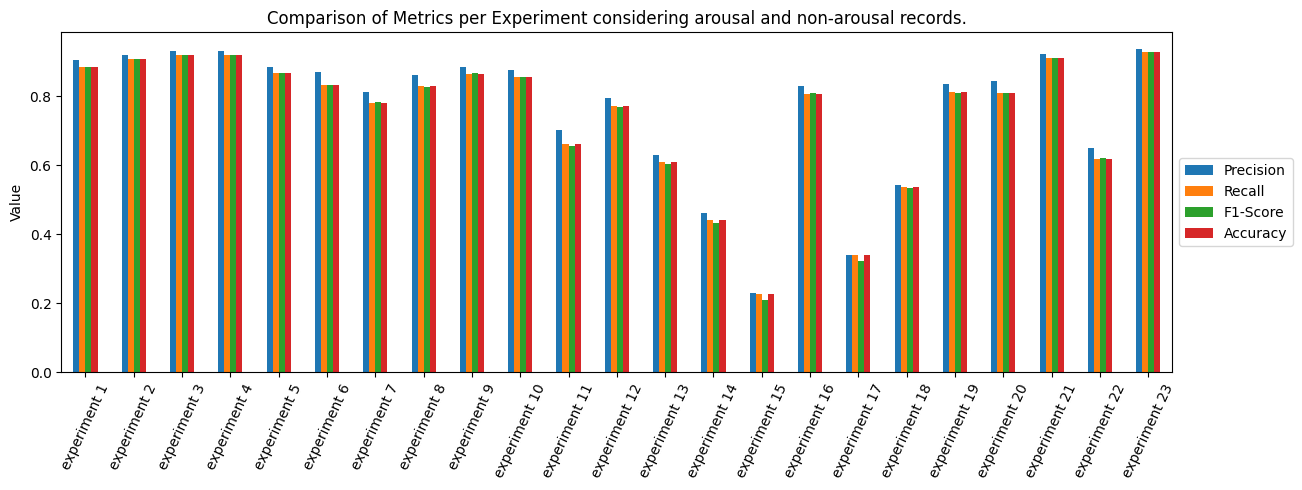

In [26]:
plt.figure(figsize=(12, 5))
metrics_df_all.plot(kind='bar', ax=plt.gca())
plt.title('Comparison of Metrics per Experiment considering arousal and non-arousal records.')
plt.ylabel('Value')
plt.xticks(rotation=65)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [27]:
metrics_df_all

,Precision,Recall,F1-Score,Accuracy,experiment_name
experiment 1,0.904623,0.885091,0.883629,0.885091,SS038/2015-02-17/001
experiment 2,0.917935,0.907178,0.907294,0.907178,SS041/2015-04-23/001
experiment 3,0.931892,0.918154,0.918627,0.918154,SS044/2015-04-28/001
experiment 4,0.930963,0.920103,0.918874,0.920103,SS044/2015-05-29/001
experiment 5,0.884832,0.867676,0.867551,0.867676,SS045/2015-05-04/001
experiment 6,0.869797,0.832036,0.831212,0.832036,SS045/2015-05-05/001
experiment 7,0.811678,0.781153,0.782349,0.781153,SS047/2015-11-23/001
experiment 8,0.861269,0.828263,0.827257,0.828263,SS047/2015-12-03/001
experiment 9,0.883478,0.864585,0.865696,0.864585,SS048/2015-11-09/001
experiment 10,0.876147,0.854576,0.856607,0.854576,SS048/2015-12-02/001


## Confusion matrix

SS038/2015-02-17/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SS041/2015-04-23/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SS044/2015-04-28/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SS044/2015-05-29/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SS045/2015-05-04/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SS045/2015-05-05/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SS047/2015-11-23/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SS047/2015-12-03/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SS048/2015-11-09/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SS048/2015-12-02/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SS066/2016-09-01/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SS069/2016-10-11/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SS069/2016-10-13/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SS070/2016-10-18/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SS071/2016-10-18/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SS075/2017-09-13/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SS075/2017-09-27/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SS076/2017-10-04/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SS077/2017-10-03/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SS077/2017-10-05/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SS078/2017-09-28/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SS078/2017-10-04/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SS078/2017-10-05/001


C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


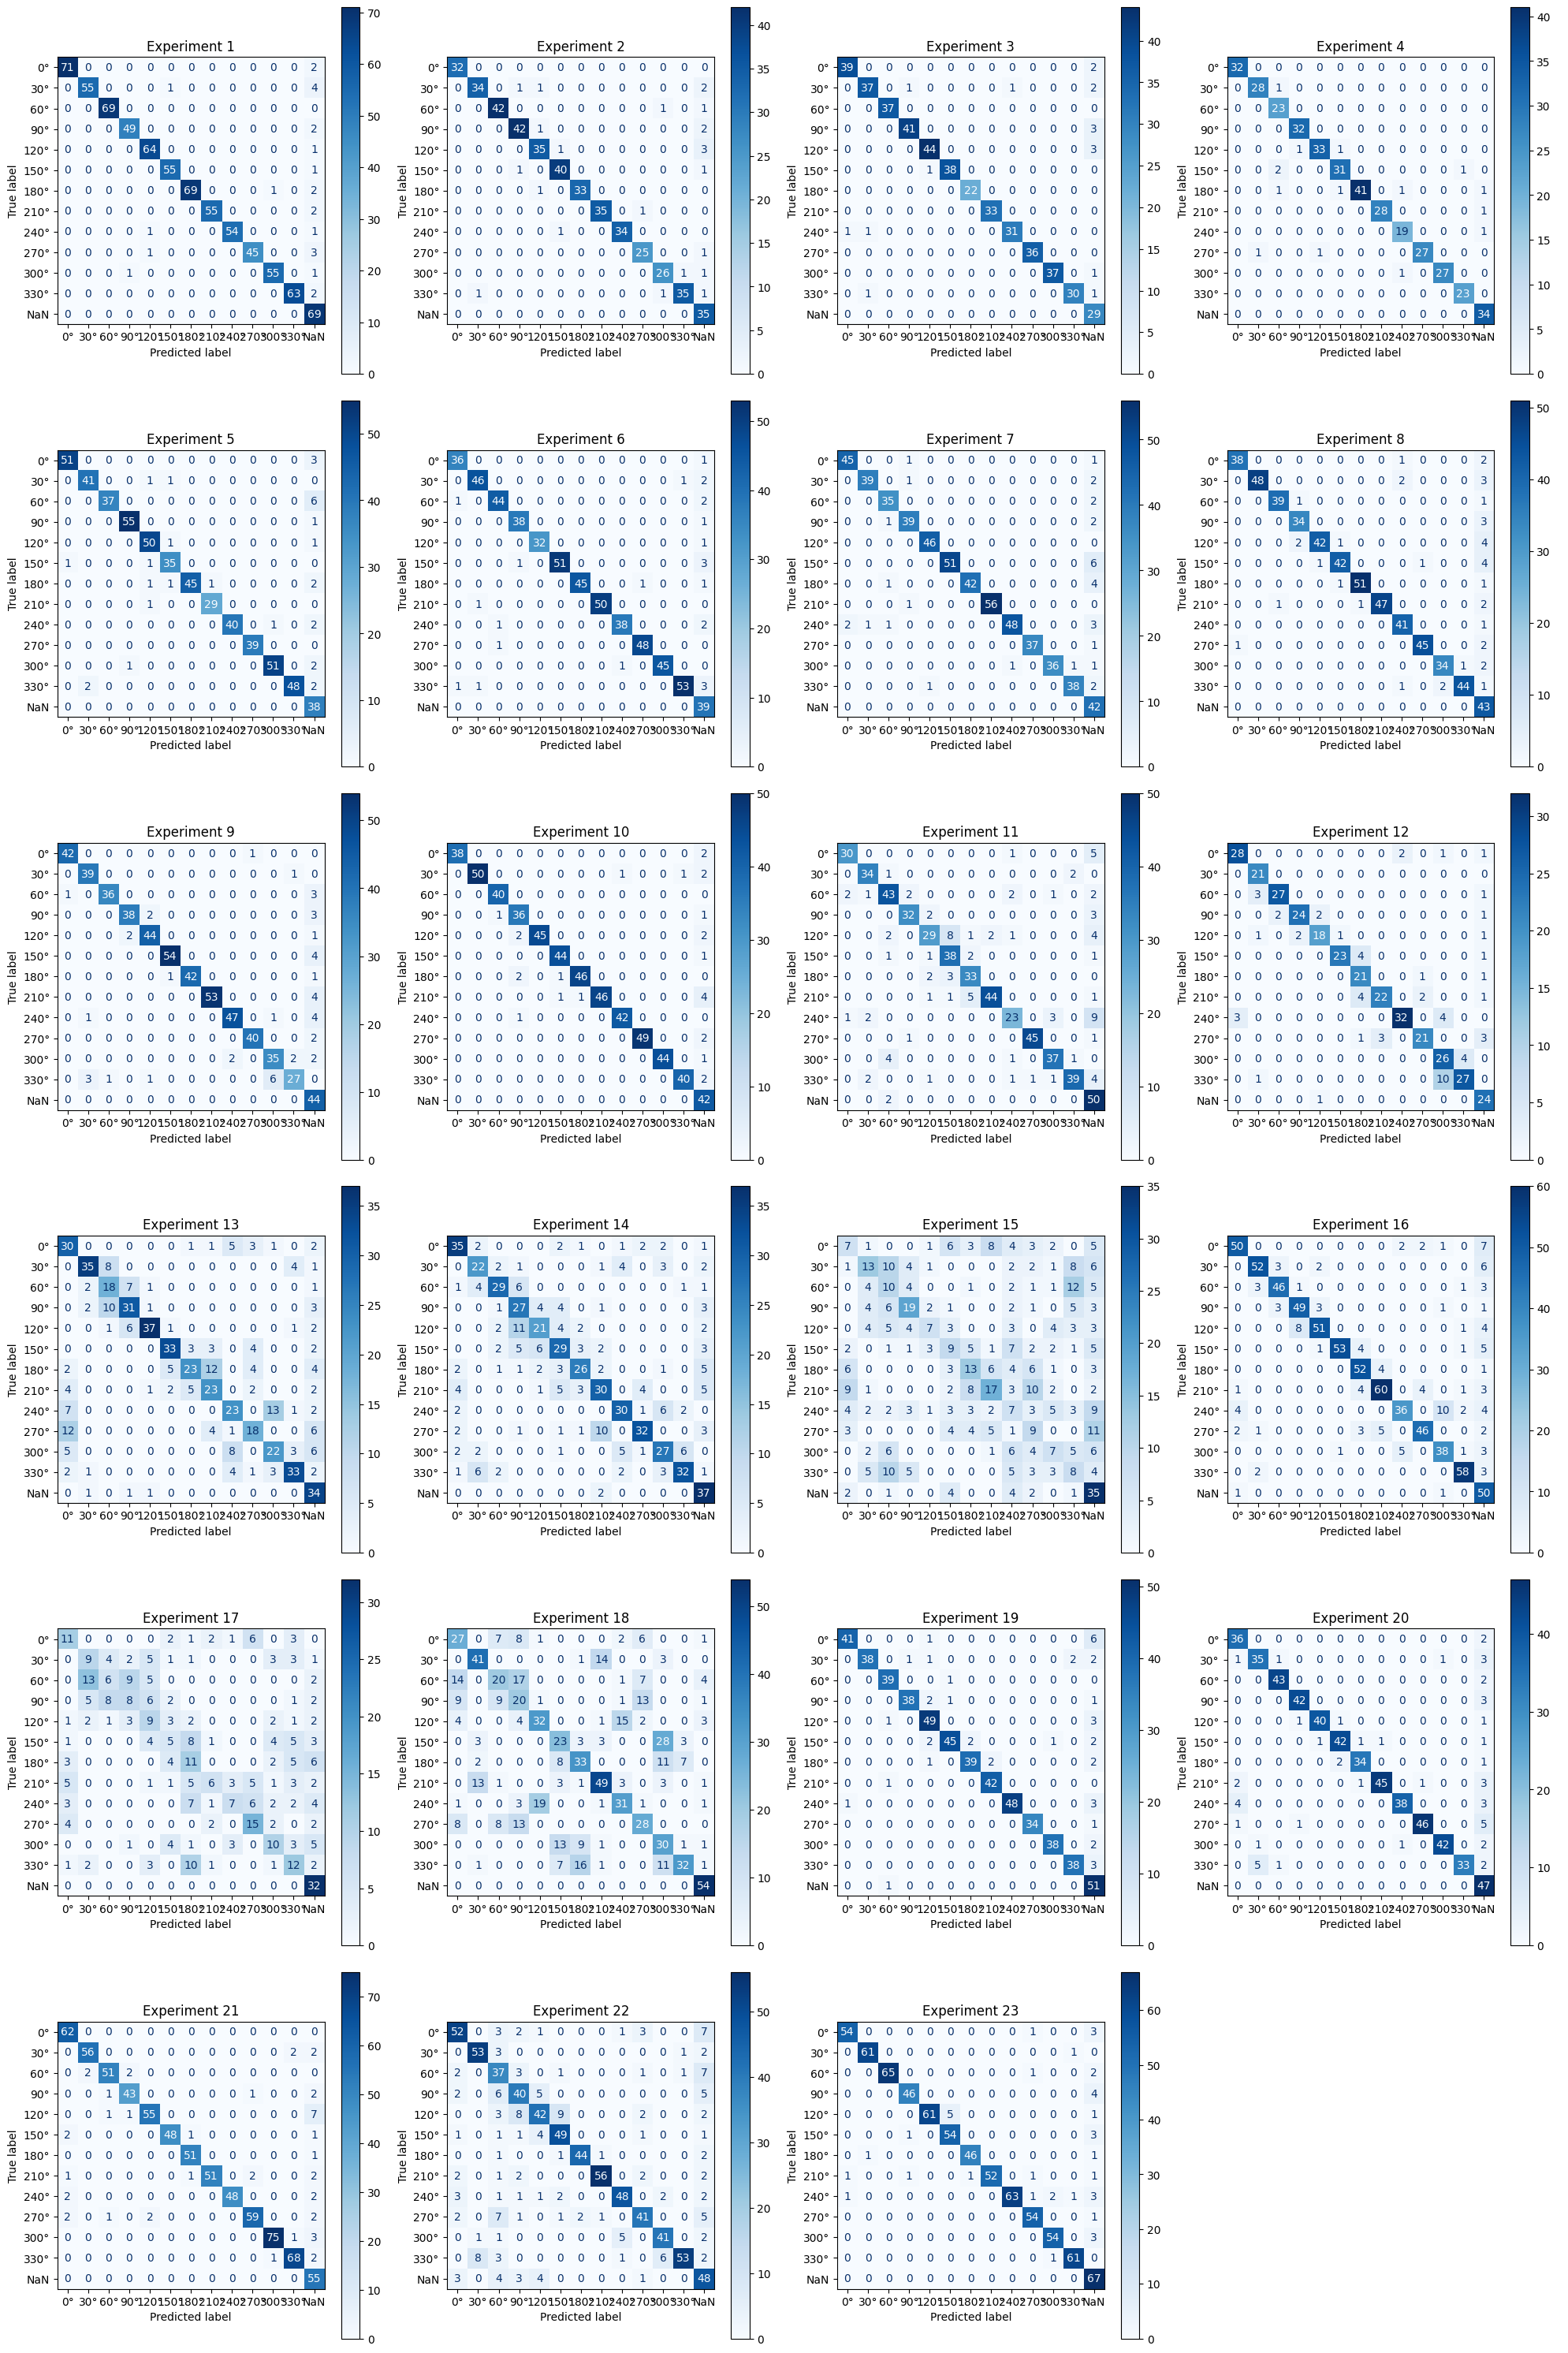

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

scaler = StandardScaler()
metric_results = []

mapping = {1: '0°', 2: '30°', 3: '60°', 4: '90°', 5: '120°', 6: '150°', 7: '180°',
           8: '210°', 9: '240°', 10: '270°', 11: '300°', 12: '330°', 13: 'NaN'}  # Clase mapping

# Prepare a figure with subplots for the confusion matrices.
fig, axes = plt.subplots(6, 4, figsize=(20, 30))

for idx, data_exp in enumerate(dataframes):
    experiment_name = data_exp['experiment'].unique()[0]
    print(experiment_name)

    best_params = best_params_df[best_params_df['experiment_name'] == experiment_name]['best_params'].iloc[0]
    features_exp = data_exp.pivot(index='nROW_x', columns='nROIs', values='dff')
    features_exp = features_exp.reset_index().drop(['nROW_x'], axis=1)
    
    dimf_exp = features_exp.shape[1]
    class_exp = data_exp[data_exp['nROIs'] == 0]['gratingID']
    class_exp = class_exp.reset_index()
    features_exp = features_exp.rename(columns={i: 'ROI' + str(i) for i in range(0, dimf_exp)})

    df_full = pd.merge(features_exp, class_exp, left_index=True, right_index=True).dropna()
    X = df_full[['ROI' + str(i) for i in range(0, dimf_exp)]].to_numpy()
    
    y = df_full['gratingID'].map(mapping).to_numpy()  # Cambio aquí: Mapeo las clases
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    svm = SVC(**best_params)
    svm.fit(X_train, y_train)
    scores = cross_validate(svm, X, y, cv=10, scoring=['precision_weighted', 'recall_weighted', 'f1_weighted', 'accuracy'])

    precision_avg = scores['test_precision_weighted'].mean()
    recall_avg = scores['test_recall_weighted'].mean()
    f1_score_avg = scores['test_f1_weighted'].mean()
    accuracy_avg = scores['test_accuracy'].mean()

    metric_results.append({
        'Precision': precision_avg,
        'Recall': recall_avg,
        'F1-Score': f1_score_avg,
        'Accuracy': accuracy_avg,
        'experiment_name': experiment_name
    })

    row_idx, col_idx = divmod(idx, 4)
    disp = plot_confusion_matrix(svm, X_test, y_test, ax=axes[row_idx, col_idx], cmap=plt.cm.Blues, display_labels=list(mapping.values()))
    disp.ax_.set_title(f'Experiment {idx + 1}')

axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

metrics_df_all = pd.DataFrame(metric_results)
metrics_df_all.index = ['experiment {}'.format(i + 1) for i in range(len(dataframes))]

#  AROUSAL/NON-AROUSAL COMPARISON MODEL (NO SMOTE NO SUB-SAMPLE)

In [138]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def process_data_for_largePupil(dataframes, pupil_value, title_suffix):
    scaler = StandardScaler()
    metric_results = []

    for data_exp in dataframes:
        experiment_name = data_exp['experiment'].unique()[0]
        
        # Get the best hyperparameters for this experiment from best_params_df
        best_params = best_params_df[best_params_df['experiment_name'] == experiment_name]['best_params'].iloc[0]

        data_exp = data_exp[data_exp['largePupil'] == pupil_value]
        features_exp = data_exp.pivot(index='nROW_x', columns='nROIs', values='dff')
        features_exp = features_exp.reset_index().drop(['nROW_x'], axis=1)

        dimf_exp = features_exp.shape[1]
        class_exp = data_exp[data_exp['nROIs'] == 0]['gratingID']
        class_exp = class_exp.reset_index()
        features_exp = features_exp.rename(columns={i: 'ROI' + str(i) for i in range(0, dimf_exp)})

        df_full = pd.merge(features_exp, class_exp, left_index=True, right_index=True).dropna()

        X = df_full[['ROI' + str(i) for i in range(0, dimf_exp)]].to_numpy()
        y = df_full['gratingID'].to_numpy()
        
        X = scaler.fit_transform(X)
        # Defines the classifier
        svm = SVC(**best_params)

        # Cross-validation applies
        scores = cross_validate(svm, X, y, cv=10, scoring=['precision_weighted', 'recall_weighted', 'f1_weighted', 'accuracy'])

        # Get average metrics
        precision_avg = scores['test_precision_weighted'].mean()
        recall_avg = scores['test_recall_weighted'].mean()
        f1_score_avg = scores['test_f1_weighted'].mean()
        accuracy_avg = scores['test_accuracy'].mean()

        metric_results.append({
            'Precision': precision_avg,
            'Recall': recall_avg,
            'F1-Score': f1_score_avg,
            'Accuracy': accuracy_avg,
            'experiment_name': experiment_name,
            'largePupil': title_suffix
        })

    metrics_df = pd.DataFrame(metric_results)
    metrics_df.index = ['Experiment {}'.format(i + 1) for i in range(len(dataframes))]
    return metrics_df
    
metrics_df_arousal = process_data_for_largePupil(dataframes, 1, 'Arousal')
metrics_df_no_arousal = process_data_for_largePupil(dataframes, 0, 'No Arousal')

# Concatenate the DataFrames downward
metrics_df = pd.concat([metrics_df_arousal, metrics_df_no_arousal], ignore_index=True)
metrics_df['experiment_id'] = metrics_df['experiment_name'].map(inverse_dict)

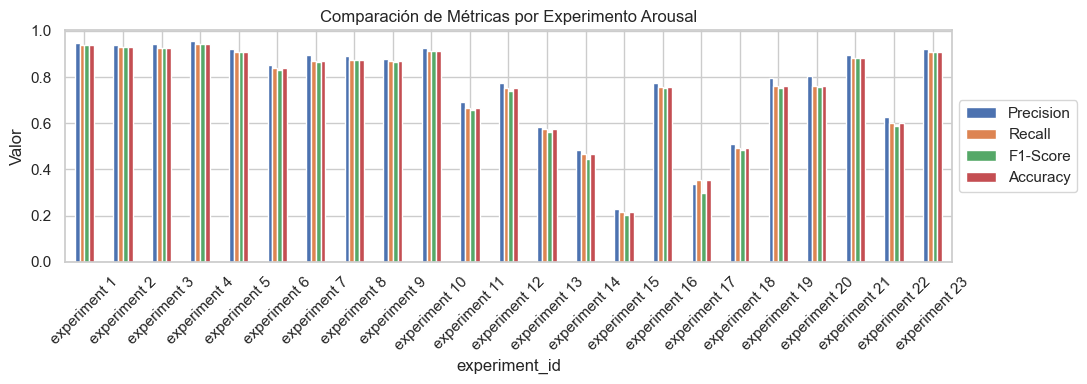

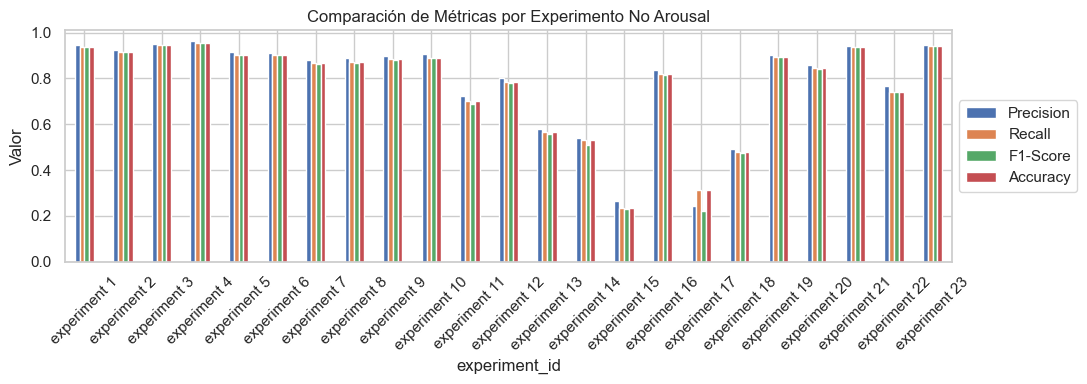

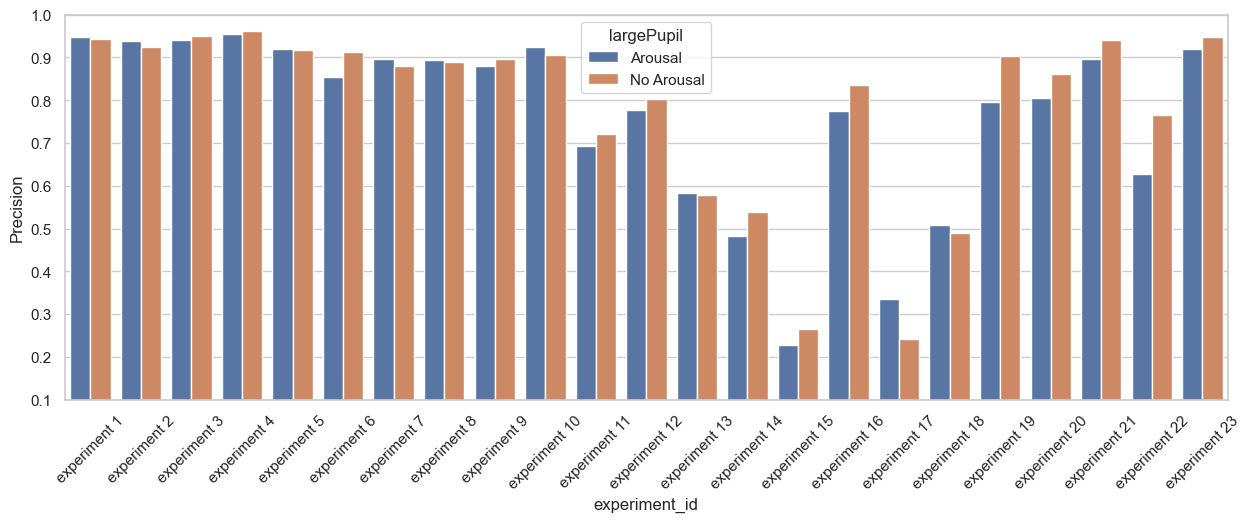

In [139]:
metrics_df.index = metrics_df['experiment_id']
plt.figure(figsize=(10, 4))
metrics_df[['Precision','Recall','F1-Score','Accuracy']][metrics_df['largePupil']=='Arousal'].plot(kind='bar', ax=plt.gca())
plt.title(f'Comparación de Métricas por Experimento Arousal')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
    
plt.figure(figsize=(10, 4))
metrics_df[['Precision','Recall','F1-Score','Accuracy']][metrics_df['largePupil']=='No Arousal'].plot(kind='bar', ax=plt.gca())
plt.title(f'Comparación de Métricas por Experimento No Arousal')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

fig,axs = plt.subplots( figsize=(15,5))
sns.barplot(x='experiment_id', y='Precision', hue ='largePupil', data=metrics_df)
plt.ylim(0.1,1)
plt.xticks(rotation=45)
plt.show()

In [140]:
metrics_df

,Precision,Recall,F1-Score,Accuracy,experiment_name,largePupil,experiment_id
experiment_id,,,,,,,
experiment 1,0.947854,0.938463,0.937564,0.938463,SS038/2015-02-17/001,Arousal,experiment 1
experiment 2,0.938017,0.931068,0.930610,0.931068,SS041/2015-04-23/001,Arousal,experiment 2
experiment 3,0.941628,0.927273,0.926692,0.927273,SS044/2015-04-28/001,Arousal,experiment 3
experiment 4,0.954569,0.945170,0.944008,0.945170,SS044/2015-05-29/001,Arousal,experiment 4
experiment 5,0.919587,0.909877,0.907475,0.909877,SS045/2015-05-04/001,Arousal,experiment 5
experiment 6,0.853173,0.837838,0.828724,0.837838,SS045/2015-05-05/001,Arousal,experiment 6
experiment 7,0.895573,0.868750,0.864415,0.868750,SS047/2015-11-23/001,Arousal,experiment 7
experiment 8,0.893035,0.875781,0.872690,0.875781,SS047/2015-12-03/001,Arousal,experiment 8
experiment 9,0.879673,0.870311,0.865943,0.870311,SS048/2015-11-09/001,Arousal,experiment 9


#  AROUSAL/NON-AROUSAL COMPARISON MODEL WITH OVERSAMPLE (SMOTE)

In [261]:
pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
   ---------------------------------------- 235.6/235.6 kB 7.3 MB/s eta 0:00:00
   ---------------------------------------- 302.2/302.2 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [141]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np
import pandas as pd

def process_data_for_largePupil(dataframes, pupil_value, title_suffix, apply_smote=False):
    scaler = StandardScaler()
    metric_results = []
    i=1
    
    for data_exp in dataframes:
        experiment_name = data_exp['experiment'].unique()[0]
        print("experimento ", i)
        i=i+1

        # Get the best hyperparameters for this experiment from best_params_df
        best_params = best_params_df[best_params_df['experiment_name'] == experiment_name]['best_params'].iloc[0]
        
        data_exp_filtered = data_exp[data_exp['largePupil'] == pupil_value]
        features_exp = data_exp_filtered.pivot(index='nROW_x', columns='nROIs', values='dff')
        features_exp = features_exp.reset_index().drop(['nROW_x'], axis=1)
        
        dimf_exp = features_exp.shape[1]
        class_exp = data_exp_filtered[data_exp_filtered['nROIs'] == 0]['gratingID']
        class_exp = class_exp.reset_index()
        features_exp = features_exp.rename(columns={i: 'ROI' + str(i) for i in range(0, dimf_exp)})
        df_full = pd.merge(features_exp, class_exp, left_index=True, right_index=True).dropna()
        
        X = df_full[['ROI' + str(i) for i in range(0, dimf_exp)]].to_numpy()
        y = df_full['gratingID'].to_numpy()
        X = scaler.fit_transform(X)

        if apply_smote:
            # Identify the class with the maximum number of entries
            max_samples = max(Counter(y).values())
            
             # Define the strategy for SMOTE based on max_samples
            strategy = {cls: max_samples for cls in np.unique(y)}
            
            print('count before SMOTE: ', len(X))
            print('classes before SMOTE: ', Counter(y))
            
            smote = SMOTE(sampling_strategy=strategy, random_state=42)
            X, y = smote.fit_resample(X, y)
            
            print('count after SMOTE: ', len(X))
            print('classes after SMOTE: ', Counter(y))
            print("---------------------------------------------------")

        # Defines the classifier
        svm = SVC(**best_params)
        
        # Cross-validation applies
        scores = cross_validate(svm, X, y, cv=10, scoring=['precision_weighted', 'recall_weighted', 'f1_weighted', 'accuracy'])
        
         # Get average metrics
        precision_avg = scores['test_precision_weighted'].mean()
        recall_avg = scores['test_recall_weighted'].mean()
        f1_score_avg = scores['test_f1_weighted'].mean()
        accuracy_avg = scores['test_accuracy'].mean()
        
        metric_results.append({
            'Precision': precision_avg,
            'Recall': recall_avg,
            'F1-Score': f1_score_avg,
            'Accuracy': accuracy_avg,
            'experiment_name': experiment_name,
            'largePupil': title_suffix
        })

    metrics_df = pd.DataFrame(metric_results)
    metrics_df.index = ['Experiment {}'.format(i + 1) for i in range(len(dataframes))]
    return metrics_df

metrics_df_arousal = process_data_for_largePupil(dataframes, 1, 'Arousal', apply_smote=True)
metrics_df_no_arousal = process_data_for_largePupil(dataframes, 0, 'No Arousal', apply_smote=True)

# Concatenate the DataFrames downward
metrics_df = pd.concat([metrics_df_arousal, metrics_df_no_arousal], ignore_index=True)
metrics_df['experiment_id'] = metrics_df['experiment_name'].map(inverse_dict)

experimento  1
count before SMOTE:  1477
classes before SMOTE:  Counter({3.0: 155, 10.0: 155, 12.0: 154, 7.0: 154, 11.0: 153, 8.0: 153, 4.0: 123, 9.0: 93, 5.0: 93, 6.0: 92, 1.0: 91, 2.0: 61})
count after SMOTE:  1860
classes after SMOTE:  Counter({1.0: 155, 11.0: 155, 6.0: 155, 2.0: 155, 12.0: 155, 9.0: 155, 3.0: 155, 10.0: 155, 8.0: 155, 4.0: 155, 5.0: 155, 7.0: 155})
---------------------------------------------------
experimento  2
count before SMOTE:  1030
classes before SMOTE:  Counter({9.0: 100, 5.0: 98, 3.0: 97, 7.0: 97, 4.0: 96, 11.0: 85, 2.0: 85, 6.0: 84, 10.0: 84, 8.0: 72, 1.0: 72, 12.0: 60})
count after SMOTE:  1200
classes after SMOTE:  Counter({9.0: 100, 6.0: 100, 11.0: 100, 10.0: 100, 3.0: 100, 8.0: 100, 5.0: 100, 7.0: 100, 2.0: 100, 4.0: 100, 12.0: 100, 1.0: 100})
---------------------------------------------------
experimento  3
count before SMOTE:  880
classes before SMOTE:  Counter({1.0: 97, 5.0: 84, 10.0: 84, 11.0: 84, 4.0: 73, 9.0: 73, 6.0: 72, 2.0: 72, 3.0: 61, 8.0

experimento  21
count before SMOTE:  1535
classes before SMOTE:  Counter({1.0: 162, 12.0: 152, 2.0: 146, 7.0: 134, 10.0: 133, 11.0: 132, 3.0: 119, 8.0: 118, 9.0: 117, 6.0: 116, 5.0: 103, 4.0: 103})
count after SMOTE:  1944
classes after SMOTE:  Counter({12.0: 162, 2.0: 162, 10.0: 162, 8.0: 162, 9.0: 162, 1.0: 162, 5.0: 162, 11.0: 162, 7.0: 162, 6.0: 162, 3.0: 162, 4.0: 162})
---------------------------------------------------
experimento  22
count before SMOTE:  1361
classes before SMOTE:  Counter({11.0: 134, 6.0: 133, 4.0: 132, 7.0: 120, 9.0: 120, 12.0: 105, 3.0: 105, 10.0: 105, 2.0: 105, 8.0: 105, 5.0: 105, 1.0: 92})
count after SMOTE:  1608
classes after SMOTE:  Counter({1.0: 134, 11.0: 134, 12.0: 134, 4.0: 134, 3.0: 134, 10.0: 134, 6.0: 134, 7.0: 134, 2.0: 134, 9.0: 134, 8.0: 134, 5.0: 134})
---------------------------------------------------
experimento  23
count before SMOTE:  1527
classes before SMOTE:  Counter({4.0: 193, 12.0: 164, 11.0: 163, 5.0: 150, 3.0: 148, 2.0: 132, 10.0:

experimento  18
count before SMOTE:  2097
classes before SMOTE:  Counter({10.0: 208, 12.0: 207, 11.0: 204, 4.0: 180, 3.0: 180, 7.0: 178, 2.0: 177, 1.0: 165, 6.0: 165, 8.0: 150, 9.0: 149, 5.0: 134})
count after SMOTE:  2496
classes after SMOTE:  Counter({11.0: 208, 8.0: 208, 10.0: 208, 4.0: 208, 7.0: 208, 9.0: 208, 2.0: 208, 12.0: 208, 3.0: 208, 1.0: 208, 6.0: 208, 5.0: 208})
---------------------------------------------------
experimento  19
count before SMOTE:  1801
classes before SMOTE:  Counter({12.0: 176, 2.0: 165, 1.0: 164, 3.0: 164, 11.0: 163, 4.0: 152, 7.0: 148, 6.0: 148, 9.0: 135, 5.0: 135, 10.0: 133, 8.0: 118})
count after SMOTE:  2112
classes after SMOTE:  Counter({4.0: 176, 7.0: 176, 10.0: 176, 12.0: 176, 9.0: 176, 11.0: 176, 1.0: 176, 6.0: 176, 8.0: 176, 2.0: 176, 5.0: 176, 3.0: 176})
---------------------------------------------------
experimento  20
count before SMOTE:  1686
classes before SMOTE:  Counter({1.0: 150, 12.0: 149, 8.0: 149, 10.0: 149, 3.0: 148, 7.0: 148, 11.0

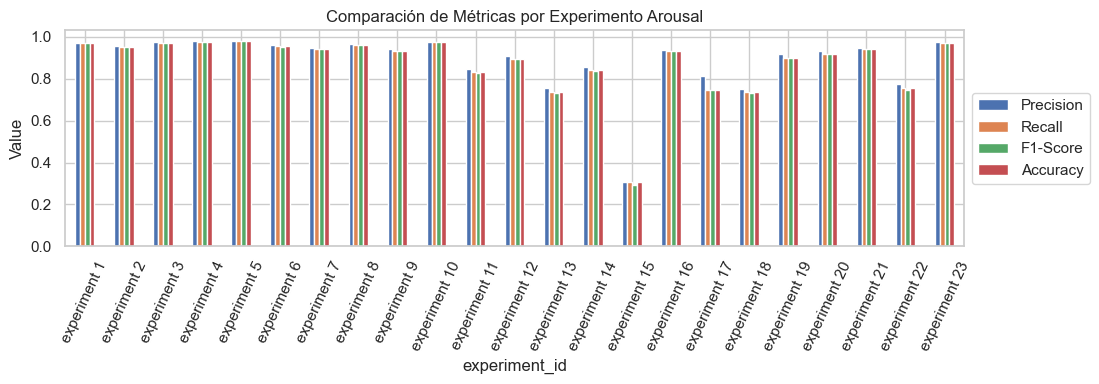

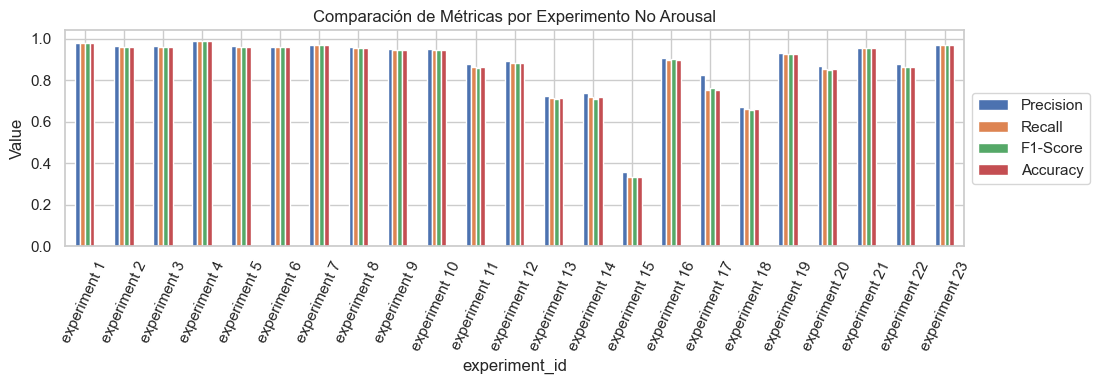

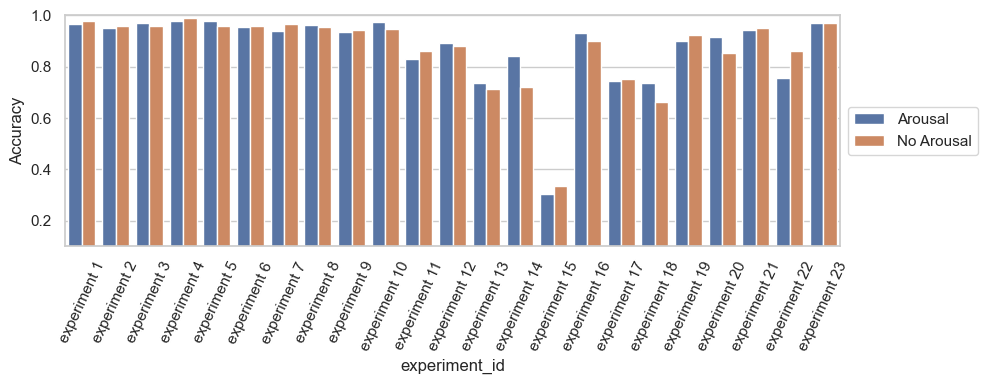

In [142]:
metrics_df.index = metrics_df['experiment_id']
plt.figure(figsize=(10, 4))
metrics_df[['Precision','Recall','F1-Score','Accuracy']][metrics_df['largePupil']=='Arousal'].plot(kind='bar', ax=plt.gca())
plt.title(f'Comparación de Métricas por Experimento Arousal')
plt.ylabel('Value')
plt.xticks(rotation=65)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
    
plt.figure(figsize=(10, 4))
metrics_df[['Precision','Recall','F1-Score','Accuracy']][metrics_df['largePupil']=='No Arousal'].plot(kind='bar', ax=plt.gca())
plt.title(f'Comparación de Métricas por Experimento No Arousal')
plt.ylabel('Value')
plt.xticks(rotation=65)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

fig,axs = plt.subplots( figsize=(10,3))
sns.barplot(x='experiment_id', y='Accuracy', hue ='largePupil', data=metrics_df)
plt.ylim(0.1,1)
plt.xticks(rotation=65)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [143]:
metrics_df

,Precision,Recall,F1-Score,Accuracy,experiment_name,largePupil,experiment_id
experiment_id,,,,,,,
experiment 1,0.971826,0.968280,0.967969,0.968280,SS038/2015-02-17/001,Arousal,experiment 1
experiment 2,0.954600,0.950833,0.950880,0.950833,SS041/2015-04-23/001,Arousal,experiment 2
experiment 3,0.975479,0.970837,0.970874,0.970837,SS044/2015-04-28/001,Arousal,experiment 3
experiment 4,0.979504,0.976983,0.977048,0.976983,SS044/2015-05-29/001,Arousal,experiment 4
experiment 5,0.981159,0.979376,0.979492,0.979376,SS045/2015-05-04/001,Arousal,experiment 5
experiment 6,0.961399,0.954444,0.951575,0.954444,SS045/2015-05-05/001,Arousal,experiment 6
experiment 7,0.947315,0.940123,0.939776,0.940123,SS047/2015-11-23/001,Arousal,experiment 7
experiment 8,0.964620,0.960581,0.960713,0.960581,SS047/2015-12-03/001,Arousal,experiment 8
experiment 9,0.942641,0.933712,0.933295,0.933712,SS048/2015-11-09/001,Arousal,experiment 9


In [144]:
# Agrupar por tipo y calcular el promedio del accuracy
Accuracy_mean = metrics_df.groupby('largePupil')['Precision'].mean()
Accuracy_mean=metrics_df.groupby('largePupil')['Precision'].agg(['mean', 'std'])

In [145]:
Accuracy_mean

,mean,std
largePupil,,
Arousal,0.885500,0.146577
No Arousal,0.880304,0.143829


# AROUSAL/NON-AROUSAL COMPARISON MODEL WITH OVERSAMPLE (SMOTE) + SUBSAMPLE

This code saves the confusion matrices for each state in .png files.

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold

mapping = {1: '0°', 2: '30°', 3: '60°', 4: '90°', 5: '120°', 6: '150°', 7: '180°',
           8: '210°', 9: '240°', 10: '270°', 11: '300°', 12: '330°'}  # Clase mapping

labels = [mapping[i] for i in sorted(mapping.keys())]  

def subsample_based_on_min_count(X, y, min_count):
    df = pd.DataFrame(X)
    df['gratingID'] = y
    sub_df = df.groupby('gratingID').apply(lambda x: x.sample(min_count)).reset_index(drop=True)
    return sub_df.drop('gratingID', axis=1).to_numpy(), sub_df['gratingID'].to_numpy()

def process_data_for_largePupil(dataframes, pupil_value, title_suffix, apply_smote=False,sub_sample=False):
    scaler = StandardScaler()
    metric_results_aroused = []
    metric_results_unaroused = []
    i = 1
    
    all_transformed_data_aroused = []
    all_transformed_data_unaroused =[]
    # Initialize figures for aroused and unaroused
    fig_aroused, axes_aroused = plt.subplots(6, 4, figsize=(20, 30))
    fig_unaroused, axes_unaroused = plt.subplots(6, 4, figsize=(20, 30))

    axes_aroused[5, 3].axis('off')
    axes_unaroused[5, 3].axis('off')

    # Initialize counter for aroused and unaroused
    count_aroused = 0
    count_unaroused = 0
    cv = StratifiedKFold(n_splits=10)
    for data_exp in dataframes:
        experiment_name = data_exp['experiment'].unique()[0]
        print("experimento ", i)
        
         # Get the best hyperparameters for this experiment from best_params_df
        best_params = best_params_df[best_params_df['experiment_name'] == experiment_name]['best_params'].iloc[0]
        
        
        i = i + 1
        
        #AROUSED
        data_exp_filtered_aroused = data_exp[data_exp['largePupil'] == 1]
        features_exp_aroused = data_exp_filtered_aroused.pivot(index='nROW_x', columns='nROIs', values='dff')
        features_exp_aroused = features_exp_aroused.reset_index().drop(['nROW_x'], axis=1)
        dimf_exp_aroused = features_exp_aroused.shape[1]
        class_exp_aroused = data_exp_filtered_aroused[data_exp_filtered_aroused['nROIs'] == 0]['gratingID']
        class_exp_aroused = class_exp_aroused.reset_index()
        features_exp_aroused = features_exp_aroused.rename(columns={i: 'ROI' + str(i) for i in range(0, dimf_exp_aroused)})
        df_full_aroused = pd.merge(features_exp_aroused, class_exp_aroused, left_index=True, right_index=True).dropna()
        X_aroused = df_full_aroused[['ROI' + str(i) for i in range(0, dimf_exp_aroused)]].to_numpy()
        y_aroused = df_full_aroused['gratingID'].to_numpy()
        X_aroused = scaler.fit_transform(X_aroused)

        # UNAROUSED
        data_exp_filtered_unaroused = data_exp[data_exp['largePupil'] == 0]
        features_exp_unaroused = data_exp_filtered_unaroused.pivot(index='nROW_x', columns='nROIs', values='dff')
        features_exp_unaroused = features_exp_unaroused.reset_index().drop(['nROW_x'], axis=1)
        dimf_exp_unaroused = features_exp_unaroused.shape[1]
        class_exp_unaroused = data_exp_filtered_unaroused[data_exp_filtered_unaroused['nROIs'] == 0]['gratingID']
        class_exp_unaroused = class_exp_unaroused.reset_index()
        features_exp_unaroused = features_exp_unaroused.rename(columns={i: 'ROI' + str(i) for i in range(0, dimf_exp_unaroused)})
        df_full_unaroused = pd.merge(features_exp_unaroused, class_exp_unaroused, left_index=True, right_index=True).dropna()
        X_unaroused = df_full_unaroused[['ROI' + str(i) for i in range(0, dimf_exp_unaroused)]].to_numpy()
        y_unaroused = df_full_unaroused['gratingID'].to_numpy()
        X_unaroused = scaler.fit_transform(X_unaroused)
        
        if apply_smote:
            #SMOTE AROUSED
            max_samples_aroused = max(Counter(y_aroused).values())
            strategy = {cls: max_samples_aroused for cls in np.unique(y_aroused)}
            print('count before SMOTE AROUSED: ', len(X_aroused))
            print('classes before SMOTE AROUSED: ', Counter(y_aroused))
            smote = SMOTE(sampling_strategy=strategy, random_state=42)
            X_aroused, y_aroused = smote.fit_resample(X_aroused, y_aroused)
            print('count after SMOTE AROUSED: ', len(X_aroused))
            print('classes after SMOTE AROUSED: ', Counter(y_aroused))
            print("---------------------------------------------------")

            #SMOTE UNAROUSED
            max_samples_unaroused = max(Counter(y_unaroused).values())
            strategy = {cls: max_samples_unaroused for cls in np.unique(y_unaroused)}
            print('count before SMOTE UNAROUSED: ', len(X_unaroused))
            print('classes before SMOTE UNAROUSED: ', Counter(y_unaroused))
            smote = SMOTE(sampling_strategy=strategy, random_state=42)
            X_unaroused, y_unaroused = smote.fit_resample(X_unaroused, y_unaroused)
            print('count after SMOTE UNAROUSED: ', len(X_unaroused))
            print('classes after SMOTE UNAROUSED: ', Counter(y_unaroused))
            print("---------------------------------------------------")

            if sub_sample:
                count_by_grating_y_aroused = np.concatenate([y_aroused])
                count_by_grating_y_unaroused = np.concatenate([y_unaroused])
                min_count_per_gratingID_y_aroused = pd.Series(count_by_grating_y_aroused).value_counts().min()
                min_count_per_gratingID_y_unaroused = pd.Series(count_by_grating_y_unaroused).value_counts().min()
                min_count_per_gratingID=min(min_count_per_gratingID_y_aroused,min_count_per_gratingID_y_unaroused)
                
                print('min_count_per_gratingID: ', min_count_per_gratingID)
                X_aroused, y_aroused = subsample_based_on_min_count(X_aroused, y_aroused, min_count_per_gratingID)
                X_unaroused, y_unaroused = subsample_based_on_min_count(X_unaroused, y_unaroused, min_count_per_gratingID)

                print('count after subsampling AROUSED: ', len(X_aroused))
                print('classes after subsampling AROUSED: ', Counter(y_aroused))
                print('count after subsampling UNAROUSED: ', len(X_unaroused))
                print('classes after subsampling UNAROUSED: ', Counter(y_unaroused))
                print("---------------------------------------------------")

        # plot confusion matrix
        for train_index, test_index in cv.split(X_aroused, y_aroused):
            X_train, X_test = X_aroused[train_index], X_aroused[test_index]
            y_train, y_test = y_aroused[train_index], y_aroused[test_index]

            svm_aroused = SVC(**best_params)
            svm_aroused.fit(X_train, y_train)

        ax = axes_aroused[count_aroused // 4, count_aroused % 4]
        plot_confusion_matrix(svm_aroused, X_test, y_test, ax=ax, cmap='Blues', display_labels=labels)
        ax.set_title(f'Exp Aroused {count_aroused + 1}')

        count_aroused += 1

        # plot confusion matrix
        for train_index, test_index in cv.split(X_unaroused, y_unaroused):
            X_train, X_test = X_unaroused[train_index], X_unaroused[test_index]
            y_train, y_test = y_unaroused[train_index], y_unaroused[test_index]

            svm_unaroused = SVC(**best_params)
            svm_unaroused.fit(X_train, y_train)

        ax = axes_unaroused[count_unaroused // 4, count_unaroused % 4]
        plot_confusion_matrix(svm_unaroused, X_test, y_test, ax=ax,  cmap='Blues', display_labels=labels)
        ax.set_title(f'Exp Unaroused {count_unaroused + 1}')

        count_unaroused += 1

        #TRANSFROMED DATA AROUSED
        transformed_data_aroused = pd.DataFrame(X_aroused, columns=[f'ROI{i}' for i in range(X_aroused.shape[1])])
        transformed_data_aroused['gratingValue'] = y_aroused
        transformed_data_aroused['experiment'] = experiment_name
        transformed_data_aroused['largePupil'] = 'Arousal' 
        # Pasamos de un formato ancho a uno largo
        melted_data_aroused = transformed_data_aroused.melt(id_vars=['gratingValue', 'experiment', 'largePupil'], 
                                        value_vars=[f'ROI{i}' for i in range(X_aroused.shape[1])], 
                                        var_name='nROIs', 
                                        value_name='dff')
        # Convertir la columna 'nROIs' de regreso a formato numérico
        melted_data_aroused['nROIs'] = melted_data_aroused['nROIs'].str.extract('(\d+)').astype(int)
        # Asumiendo que 'nROW_x' era simplemente un índice numérico creciente por experimento
        melted_data_aroused['nROW_x'] = melted_data_aroused.groupby('experiment').cumcount()
        all_transformed_data_aroused.append(melted_data_aroused)


        #TRANSFROMED DATA UNAROUSED
        transformed_data_unaroused = pd.DataFrame(X_unaroused, columns=[f'ROI{i}' for i in range(X_unaroused.shape[1])])
        transformed_data_unaroused['gratingValue'] = y_unaroused
        transformed_data_unaroused['experiment'] = experiment_name
        transformed_data_unaroused['largePupil'] = 'No Arousal' 

        melted_data_unaroused = transformed_data_unaroused.melt(id_vars=['gratingValue', 'experiment', 'largePupil'], 
                                        value_vars=[f'ROI{i}' for i in range(X_unaroused.shape[1])], 
                                        var_name='nROIs', 
                                        value_name='dff')
        melted_data_unaroused['nROIs'] = melted_data_unaroused['nROIs'].str.extract('(\d+)').astype(int)
        melted_data_unaroused['nROW_x'] = melted_data_unaroused.groupby('experiment').cumcount()
        all_transformed_data_unaroused.append(melted_data_unaroused)
        
        svm = SVC(**best_params)
        
        #METRICS AROUSED
        scores_aroused = cross_validate(svm, X_aroused, y_aroused, cv=10, scoring=['precision_weighted', 'recall_weighted', 'f1_weighted', 'accuracy'])
        precision_avg_aroused = scores_aroused['test_precision_weighted'].mean()
        recall_avg_aroused = scores_aroused['test_recall_weighted'].mean()
        f1_score_avg_aroused = scores_aroused['test_f1_weighted'].mean()
        accuracy_avg_aroused = scores_aroused['test_accuracy'].mean()

        
        metric_results_aroused.append({
            'Precision': precision_avg_aroused,
            'Recall': recall_avg_aroused,
            'F1-Score': f1_score_avg_aroused,
            'Accuracy': accuracy_avg_aroused,
            'experiment_name': experiment_name,
            'largePupil': 'Arousal'
        })

         #METRICS UNAROUSED
        scores_unaroused = cross_validate(svm, X_unaroused, y_unaroused, cv=10, scoring=['precision_weighted', 'recall_weighted', 'f1_weighted', 'accuracy'])
        precision_avg_unaroused = scores_unaroused['test_precision_weighted'].mean()
        recall_avg_unaroused = scores_unaroused['test_recall_weighted'].mean()
        f1_score_avg_unaroused = scores_unaroused['test_f1_weighted'].mean()
        accuracy_avg_unaroused = scores_unaroused['test_accuracy'].mean()
    

        metric_results_unaroused.append({
            'Precision': precision_avg_unaroused,
            'Recall': recall_avg_unaroused,
            'F1-Score': f1_score_avg_unaroused,
            'Accuracy': accuracy_avg_unaroused,
            'experiment_name': experiment_name,
            'largePupil': 'No Arousal'
        })
        
    # Save figs
    fig_aroused.savefig("matrices_confusion_aroused.png")
    fig_unaroused.savefig("matrices_confusion_unaroused.png")

    plt.close(fig_aroused)
    plt.close(fig_unaroused)
        
    metrics_df_arousal = pd.DataFrame(metric_results_aroused)
    metrics_df_arousal.index = ['Experiment {}'.format(i + 1) for i in range(len(dataframes))]

    metrics_df_unarousal = pd.DataFrame(metric_results_unaroused)
    metrics_df_unarousal.index = ['Experiment {}'.format(i + 1) for i in range(len(dataframes))]
    return metrics_df_arousal,metrics_df_unarousal, all_transformed_data_aroused, all_transformed_data_unaroused


metrics_df_arousal,metrics_df_unarousal,all_transformed_data_aroused,all_transformed_data_unaroused = process_data_for_largePupil(dataframes, 1, 'Arousal', apply_smote=True, sub_sample=True)

metrics_df = pd.concat([metrics_df_arousal,metrics_df_unarousal], ignore_index=True)
all_transformed_data_aroused = pd.concat(all_transformed_data_aroused, ignore_index=True)
all_transformed_data_unaroused = pd.concat(all_transformed_data_unaroused, ignore_index=True)
all_transformed_data = pd.concat([all_transformed_data_aroused, all_transformed_data_unaroused], ignore_index=True)
metrics_df['experiment_id'] = metrics_df['experiment_name'].map(inverse_dict)

experimento  1
count before SMOTE AROUSED:  1477
classes before SMOTE AROUSED:  Counter({3.0: 155, 10.0: 155, 12.0: 154, 7.0: 154, 11.0: 153, 8.0: 153, 4.0: 123, 9.0: 93, 5.0: 93, 6.0: 92, 1.0: 91, 2.0: 61})
count after SMOTE AROUSED:  1860
classes after SMOTE AROUSED:  Counter({1.0: 155, 11.0: 155, 6.0: 155, 2.0: 155, 12.0: 155, 9.0: 155, 3.0: 155, 10.0: 155, 8.0: 155, 4.0: 155, 5.0: 155, 7.0: 155})
---------------------------------------------------
count before SMOTE UNAROUSED:  2210
classes before SMOTE UNAROUSED:  Counter({2.0: 245, 9.0: 215, 5.0: 215, 1.0: 214, 6.0: 214, 4.0: 185, 8.0: 154, 11.0: 154, 10.0: 154, 12.0: 154, 3.0: 153, 7.0: 153})
count after SMOTE UNAROUSED:  2940
classes after SMOTE UNAROUSED:  Counter({9.0: 245, 8.0: 245, 1.0: 245, 6.0: 245, 2.0: 245, 3.0: 245, 4.0: 245, 7.0: 245, 11.0: 245, 10.0: 245, 5.0: 245, 12.0: 245})
---------------------------------------------------
min_count_per_gratingID:  155
count after subsampling AROUSED:  1860
classes after subsamp

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


experimento  2
count before SMOTE AROUSED:  1030
classes before SMOTE AROUSED:  Counter({9.0: 100, 5.0: 98, 3.0: 97, 7.0: 97, 4.0: 96, 11.0: 85, 2.0: 85, 6.0: 84, 10.0: 84, 8.0: 72, 1.0: 72, 12.0: 60})
count after SMOTE AROUSED:  1200
classes after SMOTE AROUSED:  Counter({9.0: 100, 6.0: 100, 11.0: 100, 10.0: 100, 3.0: 100, 8.0: 100, 5.0: 100, 7.0: 100, 2.0: 100, 4.0: 100, 12.0: 100, 1.0: 100})
---------------------------------------------------
count before SMOTE UNAROUSED:  1148
classes before SMOTE UNAROUSED:  Counter({12.0: 121, 1.0: 108, 8.0: 108, 10.0: 97, 6.0: 97, 11.0: 96, 2.0: 96, 4.0: 86, 3.0: 85, 5.0: 85, 7.0: 85, 9.0: 84})
count after SMOTE UNAROUSED:  1452
classes after SMOTE UNAROUSED:  Counter({10.0: 121, 3.0: 121, 1.0: 121, 11.0: 121, 2.0: 121, 5.0: 121, 12.0: 121, 4.0: 121, 8.0: 121, 7.0: 121, 6.0: 121, 9.0: 121})
---------------------------------------------------
min_count_per_gratingID:  100
count after subsampling AROUSED:  1200
classes after subsampling AROUSED:  

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


experimento  3
count before SMOTE AROUSED:  880
classes before SMOTE AROUSED:  Counter({1.0: 97, 5.0: 84, 10.0: 84, 11.0: 84, 4.0: 73, 9.0: 73, 6.0: 72, 2.0: 72, 3.0: 61, 8.0: 60, 12.0: 60, 7.0: 60})
count after SMOTE AROUSED:  1164
classes after SMOTE AROUSED:  Counter({3.0: 97, 4.0: 97, 5.0: 97, 8.0: 97, 6.0: 97, 12.0: 97, 2.0: 97, 7.0: 97, 1.0: 97, 10.0: 97, 9.0: 97, 11.0: 97})
---------------------------------------------------
count before SMOTE UNAROUSED:  1294
classes before SMOTE UNAROUSED:  Counter({8.0: 122, 7.0: 122, 3.0: 121, 12.0: 120, 2.0: 109, 9.0: 109, 4.0: 108, 6.0: 108, 5.0: 98, 11.0: 96, 10.0: 96, 1.0: 85})
count after SMOTE UNAROUSED:  1464
classes after SMOTE UNAROUSED:  Counter({1.0: 122, 3.0: 122, 8.0: 122, 4.0: 122, 5.0: 122, 12.0: 122, 2.0: 122, 7.0: 122, 6.0: 122, 9.0: 122, 11.0: 122, 10.0: 122})
---------------------------------------------------
min_count_per_gratingID:  97
count after subsampling AROUSED:  1164
classes after subsampling AROUSED:  Counter({1

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


experimento  4
count before SMOTE AROUSED:  802
classes before SMOTE AROUSED:  Counter({5.0: 94, 2.0: 91, 10.0: 90, 7.0: 76, 3.0: 75, 11.0: 75, 1.0: 75, 4.0: 60, 12.0: 60, 9.0: 46, 6.0: 45, 8.0: 15})
count after SMOTE AROUSED:  1128
classes after SMOTE AROUSED:  Counter({5.0: 94, 4.0: 94, 3.0: 94, 11.0: 94, 9.0: 94, 2.0: 94, 12.0: 94, 10.0: 94, 7.0: 94, 6.0: 94, 1.0: 94, 8.0: 94})
---------------------------------------------------
count before SMOTE UNAROUSED:  1010
classes before SMOTE UNAROUSED:  Counter({8.0: 136, 6.0: 107, 9.0: 106, 12.0: 90, 4.0: 90, 1.0: 75, 7.0: 75, 11.0: 75, 3.0: 75, 5.0: 61, 2.0: 60, 10.0: 60})
count after SMOTE UNAROUSED:  1632
classes after SMOTE UNAROUSED:  Counter({1.0: 136, 8.0: 136, 7.0: 136, 6.0: 136, 9.0: 136, 11.0: 136, 12.0: 136, 2.0: 136, 10.0: 136, 4.0: 136, 3.0: 136, 5.0: 136})
---------------------------------------------------
min_count_per_gratingID:  94
count after subsampling AROUSED:  1128
classes after subsampling AROUSED:  Counter({1.0: 9

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


experimento  5
count before SMOTE AROUSED:  942
classes before SMOTE AROUSED:  Counter({9.0: 121, 12.0: 110, 2.0: 106, 11.0: 91, 1.0: 91, 8.0: 77, 6.0: 76, 4.0: 75, 5.0: 60, 7.0: 60, 3.0: 45, 10.0: 30})
count after SMOTE AROUSED:  1452
classes after SMOTE AROUSED:  Counter({12.0: 121, 2.0: 121, 11.0: 121, 9.0: 121, 8.0: 121, 5.0: 121, 7.0: 121, 6.0: 121, 3.0: 121, 1.0: 121, 4.0: 121, 10.0: 121})
---------------------------------------------------
count before SMOTE UNAROUSED:  1787
classes before SMOTE UNAROUSED:  Counter({10.0: 198, 3.0: 182, 7.0: 167, 5.0: 165, 8.0: 152, 4.0: 151, 6.0: 151, 1.0: 139, 11.0: 135, 2.0: 121, 12.0: 120, 9.0: 106})
count after SMOTE UNAROUSED:  2376
classes after SMOTE UNAROUSED:  Counter({4.0: 198, 3.0: 198, 10.0: 198, 6.0: 198, 1.0: 198, 5.0: 198, 8.0: 198, 7.0: 198, 12.0: 198, 9.0: 198, 2.0: 198, 11.0: 198})
---------------------------------------------------
min_count_per_gratingID:  121
count after subsampling AROUSED:  1452
classes after subsampling 

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


experimento  6
count before SMOTE AROUSED:  1110
classes before SMOTE AROUSED:  Counter({12.0: 150, 1.0: 122, 3.0: 106, 4.0: 105, 10.0: 92, 6.0: 91, 11.0: 91, 8.0: 90, 2.0: 78, 9.0: 75, 7.0: 65, 5.0: 45})
count after SMOTE AROUSED:  1800
classes after SMOTE AROUSED:  Counter({7.0: 150, 1.0: 150, 10.0: 150, 12.0: 150, 8.0: 150, 6.0: 150, 3.0: 150, 4.0: 150, 9.0: 150, 11.0: 150, 2.0: 150, 5.0: 150})
---------------------------------------------------
count before SMOTE UNAROUSED:  1617
classes before SMOTE UNAROUSED:  Counter({5.0: 180, 7.0: 165, 2.0: 153, 9.0: 150, 6.0: 137, 8.0: 137, 11.0: 135, 10.0: 135, 4.0: 121, 3.0: 120, 1.0: 108, 12.0: 76})
count after SMOTE UNAROUSED:  2160
classes after SMOTE UNAROUSED:  Counter({11.0: 180, 5.0: 180, 9.0: 180, 4.0: 180, 3.0: 180, 2.0: 180, 6.0: 180, 7.0: 180, 8.0: 180, 1.0: 180, 10.0: 180, 12.0: 180})
---------------------------------------------------
min_count_per_gratingID:  150
count after subsampling AROUSED:  1800
classes after subsampling

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


experimento  7
count before SMOTE AROUSED:  1280
classes before SMOTE AROUSED:  Counter({3.0: 135, 7.0: 135, 10.0: 122, 5.0: 121, 8.0: 120, 2.0: 106, 12.0: 105, 6.0: 105, 1.0: 91, 11.0: 90, 4.0: 90, 9.0: 60})
count after SMOTE AROUSED:  1620
classes after SMOTE AROUSED:  Counter({3.0: 135, 11.0: 135, 7.0: 135, 8.0: 135, 5.0: 135, 1.0: 135, 2.0: 135, 10.0: 135, 12.0: 135, 6.0: 135, 9.0: 135, 4.0: 135})
---------------------------------------------------
count before SMOTE UNAROUSED:  1441
classes before SMOTE UNAROUSED:  Counter({9.0: 169, 1.0: 138, 11.0: 137, 4.0: 136, 2.0: 122, 12.0: 121, 6.0: 120, 10.0: 106, 8.0: 106, 5.0: 105, 7.0: 91, 3.0: 90})
count after SMOTE UNAROUSED:  2028
classes after SMOTE UNAROUSED:  Counter({6.0: 169, 4.0: 169, 9.0: 169, 12.0: 169, 3.0: 169, 1.0: 169, 10.0: 169, 2.0: 169, 8.0: 169, 7.0: 169, 11.0: 169, 5.0: 169})
---------------------------------------------------
min_count_per_gratingID:  135
count after subsampling AROUSED:  1620
classes after subsampl

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


experimento  8
count before SMOTE AROUSED:  1272
classes before SMOTE AROUSED:  Counter({10.0: 152, 4.0: 150, 1.0: 136, 5.0: 107, 7.0: 106, 8.0: 106, 9.0: 105, 2.0: 94, 11.0: 90, 12.0: 90, 3.0: 76, 6.0: 60})
count after SMOTE AROUSED:  1824
classes after SMOTE AROUSED:  Counter({6.0: 152, 3.0: 152, 11.0: 152, 7.0: 152, 5.0: 152, 9.0: 152, 10.0: 152, 12.0: 152, 4.0: 152, 1.0: 152, 8.0: 152, 2.0: 152})
---------------------------------------------------
count before SMOTE UNAROUSED:  1453
classes before SMOTE UNAROUSED:  Counter({6.0: 167, 3.0: 152, 2.0: 137, 11.0: 137, 12.0: 136, 9.0: 122, 7.0: 121, 5.0: 121, 8.0: 120, 1.0: 90, 4.0: 75, 10.0: 75})
count after SMOTE UNAROUSED:  2004
classes after SMOTE UNAROUSED:  Counter({8.0: 167, 1.0: 167, 2.0: 167, 4.0: 167, 12.0: 167, 9.0: 167, 7.0: 167, 6.0: 167, 3.0: 167, 10.0: 167, 11.0: 167, 5.0: 167})
---------------------------------------------------
min_count_per_gratingID:  152
count after subsampling AROUSED:  1824
classes after subsamplin

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


experimento  9
count before SMOTE AROUSED:  1372
classes before SMOTE AROUSED:  Counter({8.0: 152, 12.0: 137, 5.0: 135, 2.0: 135, 9.0: 135, 4.0: 121, 6.0: 106, 3.0: 105, 10.0: 91, 11.0: 90, 7.0: 90, 1.0: 75})
count after SMOTE AROUSED:  1824
classes after SMOTE AROUSED:  Counter({3.0: 152, 11.0: 152, 7.0: 152, 8.0: 152, 5.0: 152, 1.0: 152, 2.0: 152, 4.0: 152, 9.0: 152, 12.0: 152, 6.0: 152, 10.0: 152})
---------------------------------------------------
count before SMOTE UNAROUSED:  1348
classes before SMOTE UNAROUSED:  Counter({1.0: 151, 11.0: 138, 7.0: 137, 10.0: 135, 3.0: 122, 6.0: 120, 4.0: 105, 12.0: 92, 9.0: 92, 5.0: 91, 2.0: 90, 8.0: 75})
count after SMOTE UNAROUSED:  1812
classes after SMOTE UNAROUSED:  Counter({6.0: 151, 10.0: 151, 12.0: 151, 9.0: 151, 3.0: 151, 4.0: 151, 1.0: 151, 8.0: 151, 2.0: 151, 5.0: 151, 11.0: 151, 7.0: 151})
---------------------------------------------------
min_count_per_gratingID:  151
count after subsampling AROUSED:  1812
classes after subsampling

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


experimento  10
count before SMOTE AROUSED:  1360
classes before SMOTE AROUSED:  Counter({3.0: 166, 11.0: 166, 6.0: 122, 2.0: 122, 7.0: 120, 4.0: 106, 5.0: 105, 1.0: 105, 9.0: 105, 12.0: 91, 8.0: 76, 10.0: 76})
count after SMOTE AROUSED:  1992
classes after SMOTE AROUSED:  Counter({6.0: 166, 3.0: 166, 11.0: 166, 7.0: 166, 8.0: 166, 5.0: 166, 1.0: 166, 2.0: 166, 4.0: 166, 9.0: 166, 10.0: 166, 12.0: 166})
---------------------------------------------------
count before SMOTE UNAROUSED:  1363
classes before SMOTE UNAROUSED:  Counter({8.0: 152, 10.0: 151, 12.0: 138, 1.0: 122, 4.0: 122, 5.0: 121, 9.0: 121, 6.0: 106, 2.0: 105, 7.0: 105, 3.0: 60, 11.0: 60})
count after SMOTE UNAROUSED:  1824
classes after SMOTE UNAROUSED:  Counter({8.0: 152, 12.0: 152, 6.0: 152, 2.0: 152, 7.0: 152, 3.0: 152, 11.0: 152, 5.0: 152, 1.0: 152, 10.0: 152, 9.0: 152, 4.0: 152})
---------------------------------------------------
min_count_per_gratingID:  152
count after subsampling AROUSED:  1824
classes after subsam

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


experimento  11
count before SMOTE AROUSED:  1269
classes before SMOTE AROUSED:  Counter({7.0: 147, 6.0: 131, 5.0: 123, 2.0: 119, 3.0: 118, 8.0: 115, 11.0: 105, 10.0: 103, 1.0: 102, 4.0: 88, 9.0: 60, 12.0: 58})
count after SMOTE AROUSED:  1764
classes after SMOTE AROUSED:  Counter({5.0: 147, 12.0: 147, 6.0: 147, 3.0: 147, 7.0: 147, 2.0: 147, 8.0: 147, 11.0: 147, 1.0: 147, 4.0: 147, 9.0: 147, 10.0: 147})
---------------------------------------------------
count before SMOTE UNAROUSED:  1367
classes before SMOTE UNAROUSED:  Counter({9.0: 162, 12.0: 159, 4.0: 130, 11.0: 118, 10.0: 116, 1.0: 115, 3.0: 103, 2.0: 102, 5.0: 102, 8.0: 100, 6.0: 87, 7.0: 73})
count after SMOTE UNAROUSED:  1944
classes after SMOTE UNAROUSED:  Counter({9.0: 162, 12.0: 162, 1.0: 162, 11.0: 162, 10.0: 162, 8.0: 162, 4.0: 162, 6.0: 162, 2.0: 162, 5.0: 162, 3.0: 162, 7.0: 162})
---------------------------------------------------
min_count_per_gratingID:  147
count after subsampling AROUSED:  1764
classes after subsam

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


experimento  12
count before SMOTE AROUSED:  785
classes before SMOTE AROUSED:  Counter({10.0: 89, 11.0: 88, 3.0: 84, 1.0: 78, 2.0: 74, 6.0: 72, 7.0: 60, 8.0: 59, 12.0: 56, 9.0: 44, 5.0: 44, 4.0: 37})
count after SMOTE AROUSED:  1068
classes after SMOTE AROUSED:  Counter({9.0: 89, 10.0: 89, 3.0: 89, 1.0: 89, 6.0: 89, 7.0: 89, 11.0: 89, 2.0: 89, 4.0: 89, 12.0: 89, 8.0: 89, 5.0: 89})
---------------------------------------------------
count before SMOTE UNAROUSED:  950
classes before SMOTE UNAROUSED:  Counter({5.0: 103, 4.0: 103, 9.0: 101, 7.0: 86, 8.0: 83, 12.0: 78, 2.0: 73, 6.0: 73, 1.0: 73, 3.0: 60, 10.0: 59, 11.0: 58})
count after SMOTE UNAROUSED:  1236
classes after SMOTE UNAROUSED:  Counter({11.0: 103, 2.0: 103, 5.0: 103, 12.0: 103, 4.0: 103, 8.0: 103, 7.0: 103, 6.0: 103, 10.0: 103, 3.0: 103, 9.0: 103, 1.0: 103})
---------------------------------------------------
min_count_per_gratingID:  89
count after subsampling AROUSED:  1068
classes after subsampling AROUSED:  Counter({1.0: 8

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


experimento  13
count before SMOTE AROUSED:  1045
classes before SMOTE AROUSED:  Counter({8.0: 115, 4.0: 115, 6.0: 102, 1.0: 100, 12.0: 98, 5.0: 88, 2.0: 87, 11.0: 87, 3.0: 70, 7.0: 66, 9.0: 59, 10.0: 58})
count after SMOTE AROUSED:  1380
classes after SMOTE AROUSED:  Counter({8.0: 115, 5.0: 115, 1.0: 115, 2.0: 115, 10.0: 115, 3.0: 115, 4.0: 115, 12.0: 115, 6.0: 115, 11.0: 115, 7.0: 115, 9.0: 115})
---------------------------------------------------
count before SMOTE UNAROUSED:  1551
classes before SMOTE UNAROUSED:  Counter({9.0: 161, 10.0: 159, 3.0: 147, 7.0: 135, 2.0: 132, 11.0: 129, 5.0: 129, 6.0: 119, 12.0: 117, 1.0: 116, 4.0: 105, 8.0: 102})
count after SMOTE UNAROUSED:  1932
classes after SMOTE UNAROUSED:  Counter({6.0: 161, 3.0: 161, 11.0: 161, 7.0: 161, 4.0: 161, 9.0: 161, 12.0: 161, 2.0: 161, 5.0: 161, 1.0: 161, 10.0: 161, 8.0: 161})
---------------------------------------------------
min_count_per_gratingID:  115
count after subsampling AROUSED:  1380
classes after subsampli

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


experimento  14
count before SMOTE AROUSED:  1027
classes before SMOTE AROUSED:  Counter({2.0: 146, 6.0: 117, 9.0: 116, 7.0: 103, 8.0: 103, 1.0: 89, 4.0: 74, 12.0: 74, 5.0: 60, 10.0: 57, 3.0: 45, 11.0: 43})
count after SMOTE AROUSED:  1752
classes after SMOTE AROUSED:  Counter({6.0: 146, 3.0: 146, 11.0: 146, 7.0: 146, 8.0: 146, 5.0: 146, 1.0: 146, 2.0: 146, 4.0: 146, 9.0: 146, 10.0: 146, 12.0: 146})
---------------------------------------------------
count before SMOTE UNAROUSED:  1607
classes before SMOTE UNAROUSED:  Counter({11.0: 177, 3.0: 175, 5.0: 163, 10.0: 161, 4.0: 145, 12.0: 145, 1.0: 132, 7.0: 117, 8.0: 114, 6.0: 103, 9.0: 102, 2.0: 73})
count after SMOTE UNAROUSED:  2124
classes after SMOTE UNAROUSED:  Counter({4.0: 177, 5.0: 177, 8.0: 177, 7.0: 177, 12.0: 177, 3.0: 177, 11.0: 177, 1.0: 177, 10.0: 177, 2.0: 177, 9.0: 177, 6.0: 177})
---------------------------------------------------
min_count_per_gratingID:  146
count after subsampling AROUSED:  1752
classes after subsampli

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


experimento  15
count before SMOTE AROUSED:  1122
classes before SMOTE AROUSED:  Counter({12.0: 133, 8.0: 130, 10.0: 116, 11.0: 115, 2.0: 104, 9.0: 89, 4.0: 87, 6.0: 85, 3.0: 74, 7.0: 72, 1.0: 59, 5.0: 58})
count after SMOTE AROUSED:  1596
classes after SMOTE AROUSED:  Counter({8.0: 133, 3.0: 133, 7.0: 133, 12.0: 133, 10.0: 133, 1.0: 133, 4.0: 133, 5.0: 133, 9.0: 133, 11.0: 133, 2.0: 133, 6.0: 133})
---------------------------------------------------
count before SMOTE UNAROUSED:  1436
classes before SMOTE UNAROUSED:  Counter({5.0: 162, 1.0: 147, 7.0: 144, 4.0: 132, 6.0: 130, 9.0: 118, 2.0: 117, 3.0: 117, 10.0: 104, 11.0: 103, 12.0: 88, 8.0: 74})
count after SMOTE UNAROUSED:  1944
classes after SMOTE UNAROUSED:  Counter({1.0: 162, 6.0: 162, 9.0: 162, 5.0: 162, 11.0: 162, 2.0: 162, 10.0: 162, 4.0: 162, 3.0: 162, 7.0: 162, 8.0: 162, 12.0: 162})
---------------------------------------------------
min_count_per_gratingID:  133
count after subsampling AROUSED:  1596
classes after subsamplin

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


experimento  16
count before SMOTE AROUSED:  1585
classes before SMOTE AROUSED:  Counter({2.0: 220, 4.0: 151, 12.0: 149, 11.0: 133, 3.0: 132, 1.0: 131, 6.0: 130, 5.0: 120, 8.0: 119, 7.0: 105, 9.0: 105, 10.0: 90})
count after SMOTE AROUSED:  2640
classes after SMOTE AROUSED:  Counter({7.0: 220, 9.0: 220, 2.0: 220, 8.0: 220, 4.0: 220, 12.0: 220, 10.0: 220, 5.0: 220, 3.0: 220, 6.0: 220, 11.0: 220, 1.0: 220})
---------------------------------------------------
count before SMOTE UNAROUSED:  1976
classes before SMOTE UNAROUSED:  Counter({10.0: 209, 9.0: 194, 7.0: 193, 8.0: 179, 5.0: 178, 11.0: 164, 3.0: 164, 6.0: 163, 1.0: 163, 12.0: 148, 4.0: 147, 2.0: 74})
count after SMOTE UNAROUSED:  2508
classes after SMOTE UNAROUSED:  Counter({6.0: 209, 11.0: 209, 1.0: 209, 9.0: 209, 10.0: 209, 8.0: 209, 12.0: 209, 5.0: 209, 4.0: 209, 7.0: 209, 3.0: 209, 2.0: 209})
---------------------------------------------------
min_count_per_gratingID:  209
count after subsampling AROUSED:  2508
classes after sub

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


experimento  17
count before SMOTE AROUSED:  776
classes before SMOTE AROUSED:  Counter({10.0: 100, 6.0: 90, 9.0: 81, 11.0: 75, 5.0: 74, 3.0: 74, 2.0: 60, 12.0: 59, 7.0: 59, 4.0: 59, 8.0: 30, 1.0: 15})
count after SMOTE AROUSED:  1200
classes after SMOTE AROUSED:  Counter({9.0: 100, 11.0: 100, 12.0: 100, 7.0: 100, 10.0: 100, 5.0: 100, 6.0: 100, 2.0: 100, 8.0: 100, 4.0: 100, 3.0: 100, 1.0: 100})
---------------------------------------------------
count before SMOTE UNAROUSED:  1022
classes before SMOTE UNAROUSED:  Counter({1.0: 133, 8.0: 118, 12.0: 90, 4.0: 89, 7.0: 89, 2.0: 87, 5.0: 75, 11.0: 75, 9.0: 75, 3.0: 74, 10.0: 60, 6.0: 57})
count after SMOTE UNAROUSED:  1596
classes after SMOTE UNAROUSED:  Counter({1.0: 133, 4.0: 133, 7.0: 133, 5.0: 133, 11.0: 133, 2.0: 133, 9.0: 133, 3.0: 133, 12.0: 133, 8.0: 133, 10.0: 133, 6.0: 133})
---------------------------------------------------
min_count_per_gratingID:  100
count after subsampling AROUSED:  1200
classes after subsampling AROUSED:  C

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


experimento  18
count before SMOTE AROUSED:  1499
classes before SMOTE AROUSED:  Counter({5.0: 164, 8.0: 150, 9.0: 149, 6.0: 133, 1.0: 133, 4.0: 120, 11.0: 119, 3.0: 118, 7.0: 118, 2.0: 117, 12.0: 89, 10.0: 89})
count after SMOTE AROUSED:  1968
classes after SMOTE AROUSED:  Counter({2.0: 164, 6.0: 164, 1.0: 164, 9.0: 164, 12.0: 164, 5.0: 164, 3.0: 164, 4.0: 164, 8.0: 164, 11.0: 164, 7.0: 164, 10.0: 164})
---------------------------------------------------
count before SMOTE UNAROUSED:  2097
classes before SMOTE UNAROUSED:  Counter({10.0: 208, 12.0: 207, 11.0: 204, 4.0: 180, 3.0: 180, 7.0: 178, 2.0: 177, 1.0: 165, 6.0: 165, 8.0: 150, 9.0: 149, 5.0: 134})
count after SMOTE UNAROUSED:  2496
classes after SMOTE UNAROUSED:  Counter({11.0: 208, 8.0: 208, 10.0: 208, 4.0: 208, 7.0: 208, 9.0: 208, 2.0: 208, 12.0: 208, 3.0: 208, 1.0: 208, 6.0: 208, 5.0: 208})
---------------------------------------------------
min_count_per_gratingID:  164
count after subsampling AROUSED:  1968
classes after sub

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


experimento  19
count before SMOTE AROUSED:  904
classes before SMOTE AROUSED:  Counter({8.0: 103, 4.0: 102, 9.0: 89, 5.0: 89, 10.0: 88, 6.0: 75, 7.0: 74, 11.0: 60, 3.0: 60, 2.0: 60, 1.0: 59, 12.0: 45})
count after SMOTE AROUSED:  1236
classes after SMOTE AROUSED:  Counter({12.0: 103, 11.0: 103, 3.0: 103, 6.0: 103, 4.0: 103, 10.0: 103, 2.0: 103, 9.0: 103, 8.0: 103, 5.0: 103, 1.0: 103, 7.0: 103})
---------------------------------------------------
count before SMOTE UNAROUSED:  1801
classes before SMOTE UNAROUSED:  Counter({12.0: 176, 2.0: 165, 1.0: 164, 3.0: 164, 11.0: 163, 4.0: 152, 7.0: 148, 6.0: 148, 9.0: 135, 5.0: 135, 10.0: 133, 8.0: 118})
count after SMOTE UNAROUSED:  2112
classes after SMOTE UNAROUSED:  Counter({4.0: 176, 7.0: 176, 10.0: 176, 12.0: 176, 9.0: 176, 11.0: 176, 1.0: 176, 6.0: 176, 8.0: 176, 2.0: 176, 5.0: 176, 3.0: 176})
---------------------------------------------------
min_count_per_gratingID:  103
count after subsampling AROUSED:  1236
classes after subsampling 

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


experimento  20
count before SMOTE AROUSED:  987
classes before SMOTE AROUSED:  Counter({2.0: 120, 5.0: 90, 9.0: 89, 4.0: 89, 10.0: 80, 6.0: 75, 11.0: 75, 1.0: 75, 8.0: 74, 3.0: 74, 12.0: 74, 7.0: 72})
count after SMOTE AROUSED:  1440
classes after SMOTE AROUSED:  Counter({10.0: 120, 9.0: 120, 4.0: 120, 6.0: 120, 2.0: 120, 8.0: 120, 5.0: 120, 11.0: 120, 7.0: 120, 1.0: 120, 3.0: 120, 12.0: 120})
---------------------------------------------------
count before SMOTE UNAROUSED:  1686
classes before SMOTE UNAROUSED:  Counter({1.0: 150, 12.0: 149, 8.0: 149, 10.0: 149, 3.0: 148, 7.0: 148, 11.0: 147, 6.0: 146, 4.0: 133, 9.0: 132, 5.0: 131, 2.0: 104})
count after SMOTE UNAROUSED:  1800
classes after SMOTE UNAROUSED:  Counter({1.0: 150, 4.0: 150, 3.0: 150, 6.0: 150, 5.0: 150, 9.0: 150, 12.0: 150, 7.0: 150, 2.0: 150, 11.0: 150, 8.0: 150, 10.0: 150})
---------------------------------------------------
min_count_per_gratingID:  120
count after subsampling AROUSED:  1440
classes after subsampling A

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


experimento  21
count before SMOTE AROUSED:  1535
classes before SMOTE AROUSED:  Counter({1.0: 162, 12.0: 152, 2.0: 146, 7.0: 134, 10.0: 133, 11.0: 132, 3.0: 119, 8.0: 118, 9.0: 117, 6.0: 116, 5.0: 103, 4.0: 103})
count after SMOTE AROUSED:  1944
classes after SMOTE AROUSED:  Counter({12.0: 162, 2.0: 162, 10.0: 162, 8.0: 162, 9.0: 162, 1.0: 162, 5.0: 162, 11.0: 162, 7.0: 162, 6.0: 162, 3.0: 162, 4.0: 162})
---------------------------------------------------
count before SMOTE UNAROUSED:  2025
classes before SMOTE UNAROUSED:  Counter({5.0: 194, 4.0: 194, 9.0: 179, 8.0: 179, 3.0: 179, 6.0: 178, 10.0: 164, 11.0: 163, 7.0: 163, 12.0: 150, 2.0: 149, 1.0: 133})
count after SMOTE UNAROUSED:  2328
classes after SMOTE UNAROUSED:  Counter({12.0: 194, 5.0: 194, 9.0: 194, 8.0: 194, 4.0: 194, 10.0: 194, 11.0: 194, 3.0: 194, 6.0: 194, 2.0: 194, 7.0: 194, 1.0: 194})
---------------------------------------------------
min_count_per_gratingID:  162
count after subsampling AROUSED:  1944
classes after s

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


experimento  22
count before SMOTE AROUSED:  1361
classes before SMOTE AROUSED:  Counter({11.0: 134, 6.0: 133, 4.0: 132, 7.0: 120, 9.0: 120, 12.0: 105, 3.0: 105, 10.0: 105, 2.0: 105, 8.0: 105, 5.0: 105, 1.0: 92})
count after SMOTE AROUSED:  1608
classes after SMOTE AROUSED:  Counter({1.0: 134, 11.0: 134, 12.0: 134, 4.0: 134, 3.0: 134, 10.0: 134, 6.0: 134, 7.0: 134, 2.0: 134, 9.0: 134, 8.0: 134, 5.0: 134})
---------------------------------------------------
count before SMOTE UNAROUSED:  2248
classes before SMOTE UNAROUSED:  Counter({1.0: 237, 3.0: 195, 12.0: 195, 5.0: 194, 10.0: 194, 8.0: 193, 2.0: 190, 7.0: 179, 9.0: 178, 6.0: 165, 4.0: 165, 11.0: 163})
count after SMOTE UNAROUSED:  2844
classes after SMOTE UNAROUSED:  Counter({5.0: 237, 11.0: 237, 10.0: 237, 6.0: 237, 8.0: 237, 3.0: 237, 9.0: 237, 2.0: 237, 1.0: 237, 12.0: 237, 7.0: 237, 4.0: 237})
---------------------------------------------------
min_count_per_gratingID:  134
count after subsampling AROUSED:  1608
classes after su

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


experimento  23
count before SMOTE AROUSED:  1527
classes before SMOTE AROUSED:  Counter({4.0: 193, 12.0: 164, 11.0: 163, 5.0: 150, 3.0: 148, 2.0: 132, 10.0: 119, 6.0: 103, 9.0: 100, 1.0: 90, 7.0: 90, 8.0: 75})
count after SMOTE AROUSED:  2316
classes after SMOTE AROUSED:  Counter({12.0: 193, 2.0: 193, 10.0: 193, 8.0: 193, 9.0: 193, 1.0: 193, 5.0: 193, 11.0: 193, 7.0: 193, 6.0: 193, 3.0: 193, 4.0: 193})
---------------------------------------------------
count before SMOTE UNAROUSED:  2073
classes before SMOTE UNAROUSED:  Counter({8.0: 225, 1.0: 209, 7.0: 209, 6.0: 195, 9.0: 194, 10.0: 177, 12.0: 164, 2.0: 163, 5.0: 150, 3.0: 150, 11.0: 134, 4.0: 103})
count after SMOTE UNAROUSED:  2700
classes after SMOTE UNAROUSED:  Counter({9.0: 225, 8.0: 225, 5.0: 225, 12.0: 225, 1.0: 225, 10.0: 225, 6.0: 225, 3.0: 225, 4.0: 225, 11.0: 225, 7.0: 225, 2.0: 225})
---------------------------------------------------
min_count_per_gratingID:  193
count after subsampling AROUSED:  2316
classes after subs

C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FelipeMartin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


In [40]:
metrics_df

,Precision,Recall,F1-Score,Accuracy,experiment_name,largePupil,experiment_id
0,0.994550,0.994086,0.994107,0.994086,SS038/2015-02-17/001,Arousal,experiment 1
1,0.982828,0.980833,0.980711,0.980833,SS041/2015-04-23/001,Arousal,experiment 2
2,0.986904,0.985396,0.985250,0.985396,SS044/2015-04-28/001,Arousal,experiment 3
3,0.986381,0.984948,0.984954,0.984948,SS044/2015-05-29/001,Arousal,experiment 4
4,0.989258,0.988299,0.988296,0.988299,SS045/2015-05-04/001,Arousal,experiment 5
5,0.985788,0.984444,0.984458,0.984444,SS045/2015-05-05/001,Arousal,experiment 6
6,0.982322,0.980247,0.980326,0.980247,SS047/2015-11-23/001,Arousal,experiment 7
7,0.980749,0.978637,0.978765,0.978637,SS047/2015-12-03/001,Arousal,experiment 8
8,0.964477,0.960279,0.960771,0.960279,SS048/2015-11-09/001,Arousal,experiment 9
9,0.990421,0.989584,0.989562,0.989584,SS048/2015-12-02/001,Arousal,experiment 10


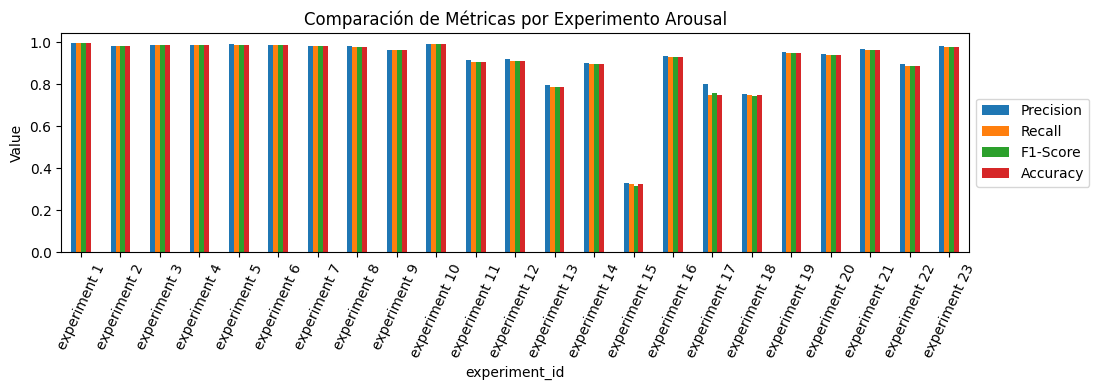

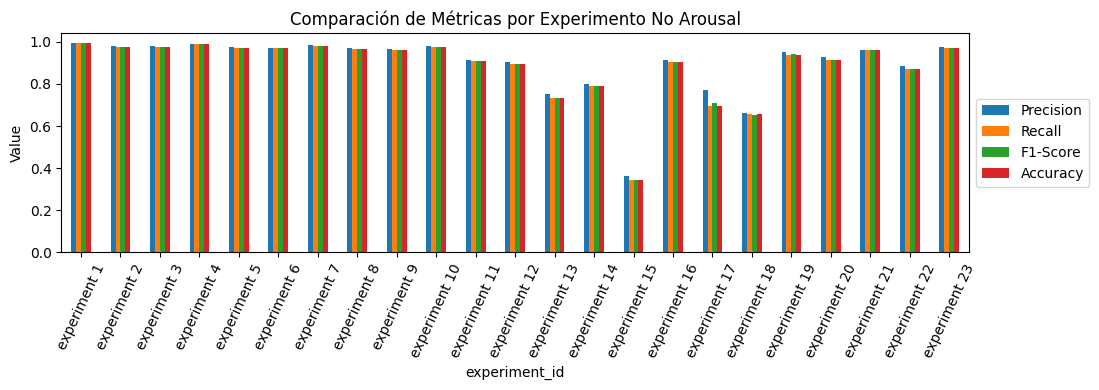

In [41]:
metrics_df.index = metrics_df['experiment_id']
plt.figure(figsize=(10, 4))
metrics_df[['Precision','Recall','F1-Score','Accuracy']][metrics_df['largePupil']=='Arousal'].plot(kind='bar', ax=plt.gca())
plt.title(f'Comparación de Métricas por Experimento Arousal')
plt.ylabel('Value')
plt.xticks(rotation=65)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
    
plt.figure(figsize=(10, 4))
metrics_df[['Precision','Recall','F1-Score','Accuracy']][metrics_df['largePupil']=='No Arousal'].plot(kind='bar', ax=plt.gca())
plt.title(f'Comparación de Métricas por Experimento No Arousal')
plt.ylabel('Value')
plt.xticks(rotation=65)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


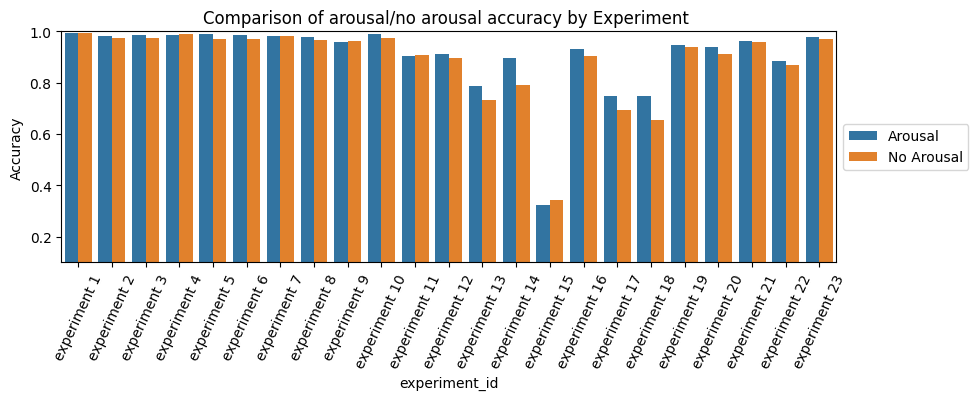

In [42]:

fig,axs = plt.subplots( figsize=(10,3))
sns.barplot(x='experiment_id', y='Accuracy', hue ='largePupil', data=metrics_df)
plt.ylim(0.1,1)
plt.xticks(rotation=65)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title(f'Comparison of arousal/no arousal accuracy by Experiment ')
plt.show()

In [43]:
# Agrupar por tipo y calcular el promedio del accuracy
Accuracy_mean = metrics_df.groupby('largePupil')['Precision'].mean()
Accuracy_mean=metrics_df.groupby('largePupil')['Precision'].agg(['mean', 'std'])

In [44]:
Accuracy_mean

,mean,std
largePupil,,
Arousal,0.910200,0.143789
No Arousal,0.893635,0.145870


# Record by grating by experiment after AROUSED DATA AFTER SMOTE + SUBSAMPLE

In [37]:
aroused_data_after_SMOTE_subsample

,gratingValue,experiment,largePupil,nROIs,dff,nROW_x
0,1.0,SS038/2015-02-17/001,Arousal,0,-0.976119,0
1,1.0,SS038/2015-02-17/001,Arousal,0,0.380143,1
2,1.0,SS038/2015-02-17/001,Arousal,0,1.470235,2
3,1.0,SS038/2015-02-17/001,Arousal,0,-0.557270,3
4,1.0,SS038/2015-02-17/001,Arousal,0,-0.126259,4
...,...,...,...,...,...,...
9678355,12.0,SS078/2017-10-05/001,Arousal,0,0.938524,2311
9678356,12.0,SS078/2017-10-05/001,Arousal,0,0.494278,2312
9678357,12.0,SS078/2017-10-05/001,Arousal,0,-0.301024,2313
9678358,12.0,SS078/2017-10-05/001,Arousal,0,0.383023,2314


In [38]:
aroused_data_after_SMOTE_subsample=all_transformed_data[all_transformed_data['largePupil']=='Arousal'][all_transformed_data['nROIs']==0]
aroused_data_after_SMOTE_subsample['gratingValue2'] = aroused_data_after_SMOTE_subsample['gratingValue'].map(mapping)

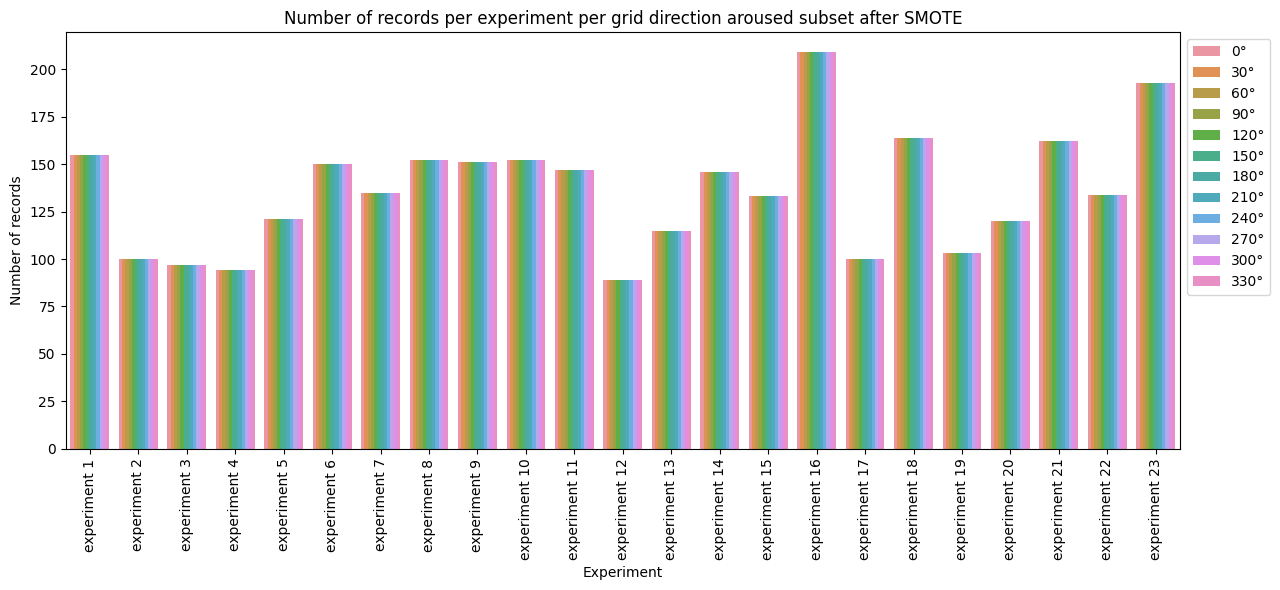

In [39]:

import seaborn as sns
import matplotlib.pyplot as plt

records_by_experiment = aroused_data_after_SMOTE_subsample.groupby(['experiment','gratingValue','gratingValue2'])['dff'].count().reset_index()
records_by_experiment['experiment_id'] = records_by_experiment['experiment'].map(inverse_dict)
plt.figure(figsize=(12, 6))
sns.barplot(x='experiment_id', y='dff', data=records_by_experiment, hue='gratingValue2')
plt.xlabel('Experiment')
plt.ylabel('Number of records')
plt.title('Number of records per experiment per grid direction aroused subset after SMOTE')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), numpoints=2,ncol=1, fontsize=10)
plt.show()

# record by grating by experiment  UNAROUSED DATA after SMOTE + SUBSAMPLE

In [40]:
unaroused_data_after_SMOTE_subsample=all_transformed_data[all_transformed_data['largePupil']=='No Arousal'][all_transformed_data['nROIs']==0]
unaroused_data_after_SMOTE_subsample['gratingValue2'] = unaroused_data_after_SMOTE_subsample['gratingValue'].map(mapping)

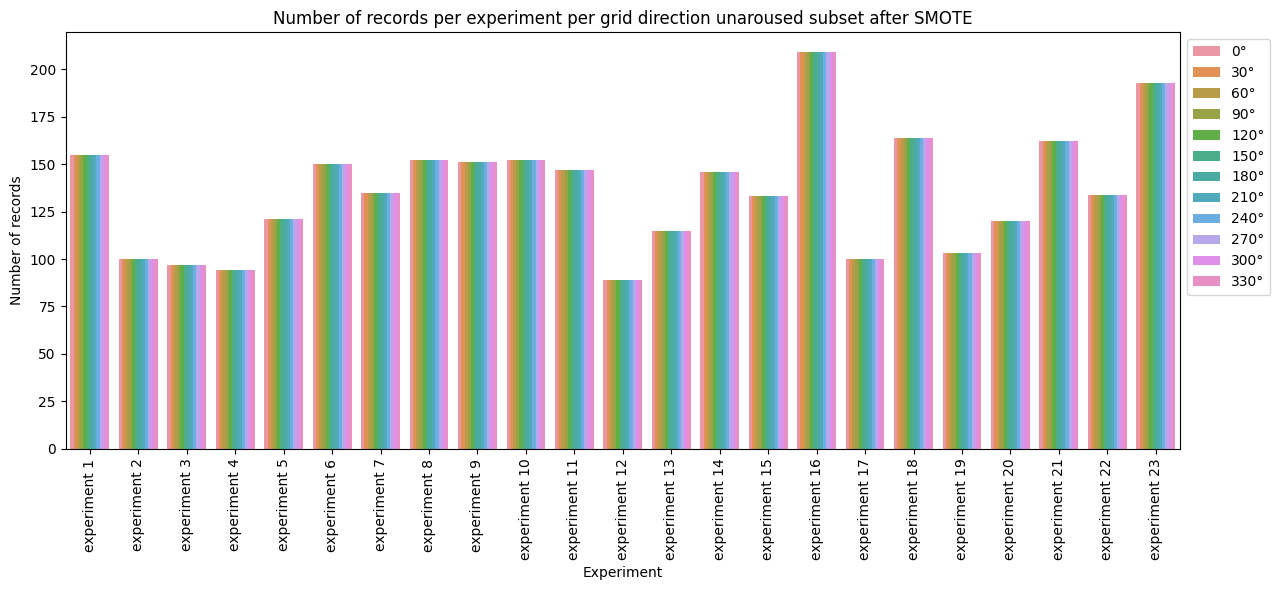

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
records_by_experiment = unaroused_data_after_SMOTE_subsample.groupby(['experiment','gratingValue','gratingValue2'])['dff'].count().reset_index()
records_by_experiment['experiment_id'] = records_by_experiment['experiment'].map(inverse_dict)
plt.figure(figsize=(12, 6))
sns.barplot(x='experiment_id', y='dff', data=records_by_experiment, hue='gratingValue2')
plt.xlabel('Experiment')
plt.ylabel('Number of records')
plt.title('Number of records per experiment per grid direction unaroused subset after SMOTE')
plt.xticks(rotation=90)   # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), numpoints=2,ncol=1, fontsize=10)
plt.show()

# CORRELATIONS

In [71]:
metrics_df_all=metrics_df_all.reset_index()
metrics_df_all=metrics_df_all.rename(columns={"index": "experiment_id"})

In [72]:

metrics_correlation_0 = pd.merge(avg_DSI, neuronas_por_experimento, on='experiment_id', how='inner')
metrics_correlation_0 = metrics_correlation_0.drop(['experiment_x'], axis=1)
metrics_correlation_1 = pd.merge(metrics_correlation_0, records_by_experiment, on='experiment_id', how='inner')
metrics_correlation_2 = pd.merge(metrics_correlation_1, records_by_experiment_by_neuron, on='experiment_id', how='inner')
metrics_correlation_2 = metrics_correlation_2.drop(['experiment_y'], axis=1)
metrics_correlation_3 = pd.merge(metrics_correlation_2, avg_by_std_direction_tuning_curve, on='experiment_id', how='inner')
metrics_correlation_3 = metrics_correlation_3.drop(['experiment_x'], axis=1)
metrics_correlation = pd.merge(metrics_correlation_3, metrics_df_all, on='experiment_id', how='inner')


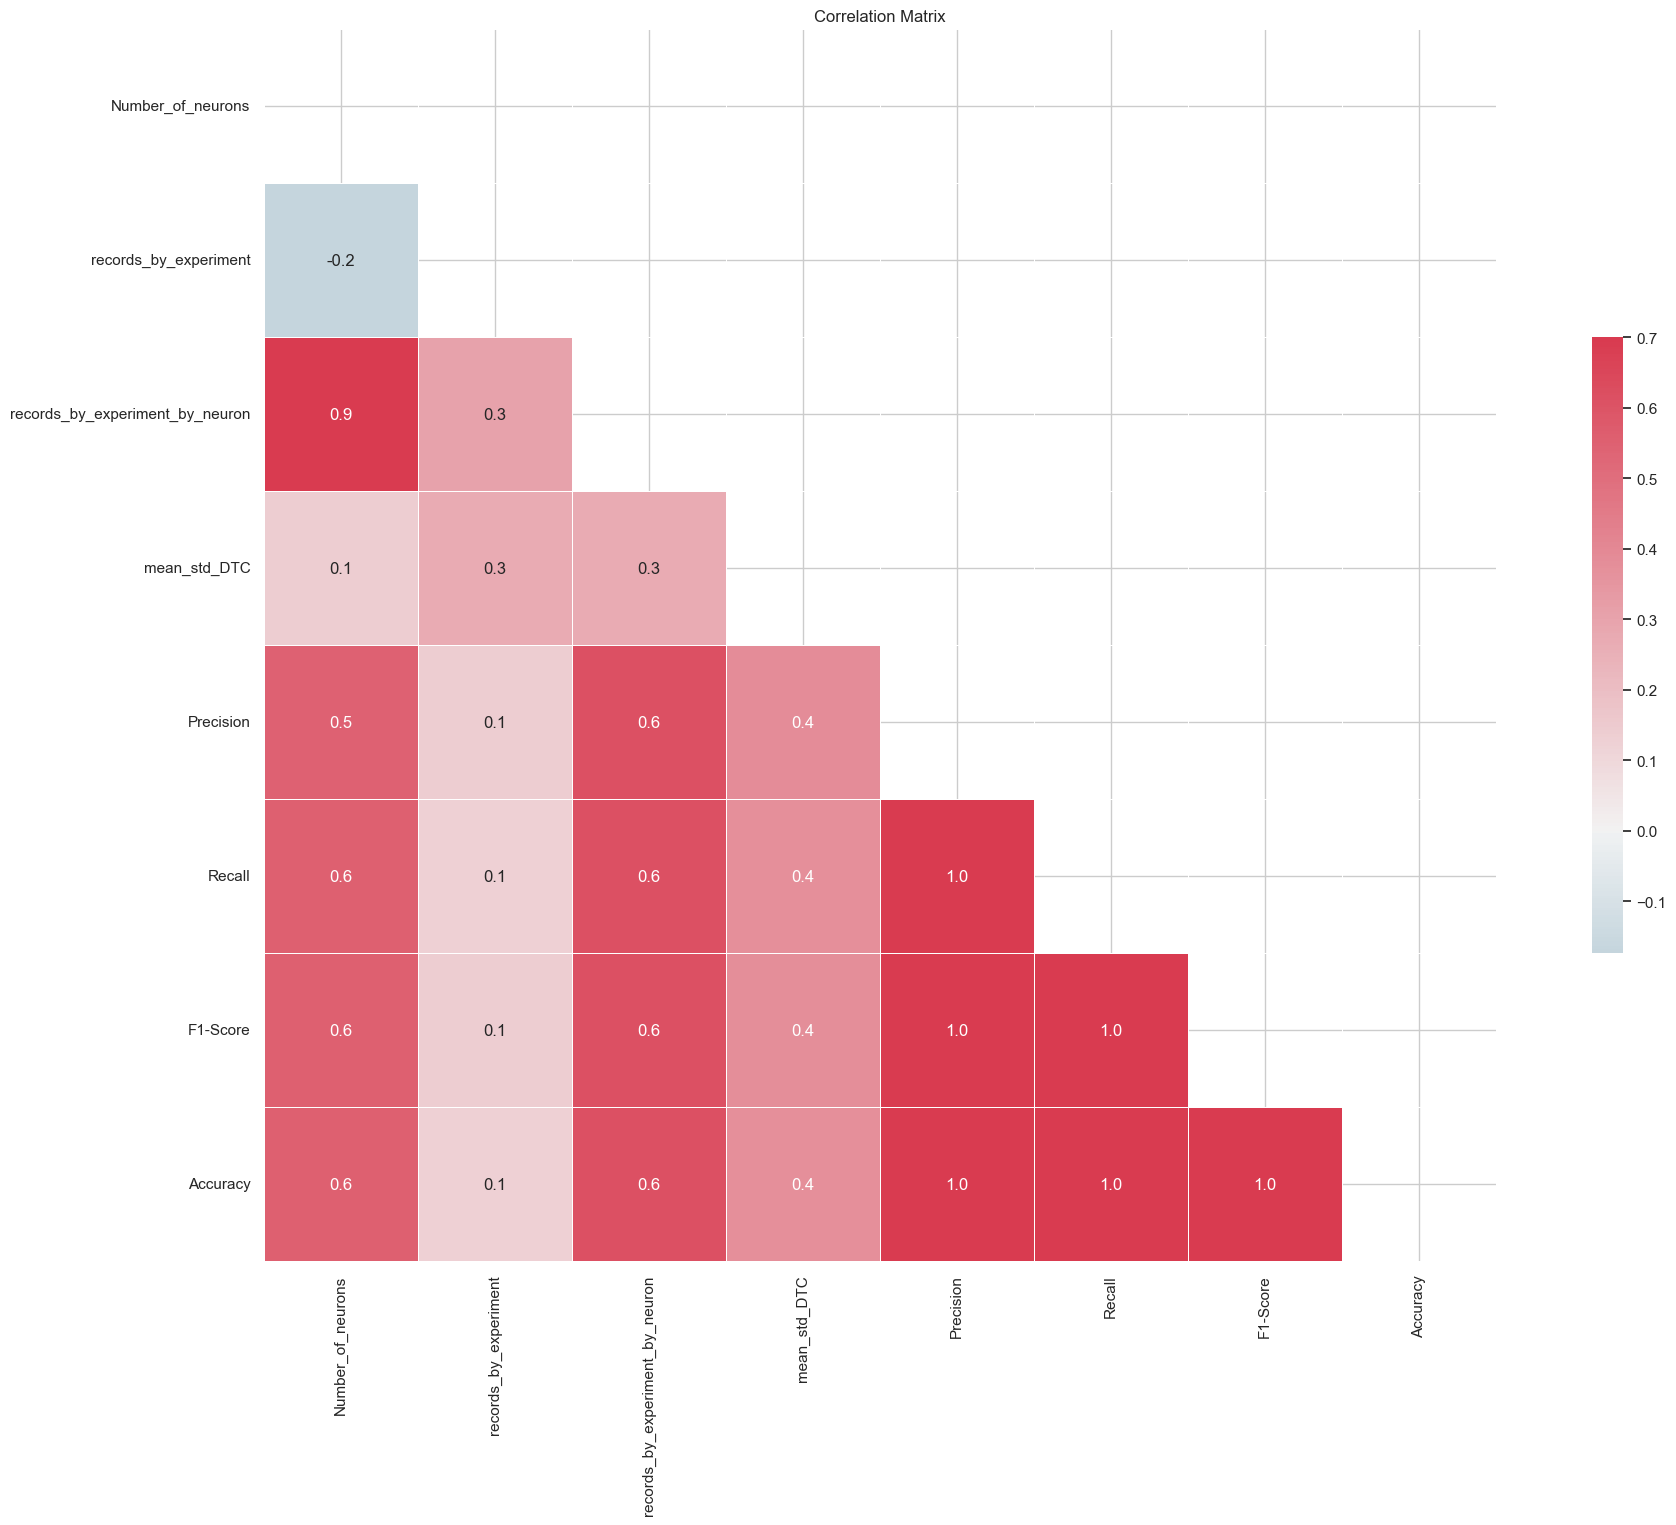

In [74]:
#corr=metrics_correlation[['Number_of_neurons','mean_DSI','std_DSI','records_by_experiment','records_by_experiment_by_neuron','mean_std_DTC','Precision','Recall','F1-Score','Accuracy']].corr()
corr=metrics_correlation[['Number_of_neurons','records_by_experiment','records_by_experiment_by_neuron','mean_std_DTC','Precision','Recall','F1-Score','Accuracy']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 16))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 8, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot = True, fmt='.1f')
#sns.set(font_scale=1.5)
plt.title("Correlation Matrix")
plt.show()

### Accuracy vs Records by experiment by neuron

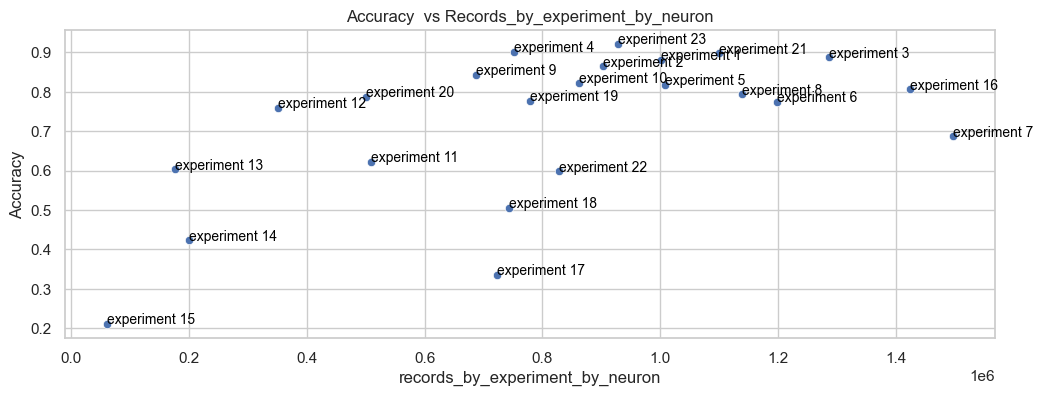

In [220]:
fig,axs = plt.subplots( figsize=(12,4))
sns.set_style("whitegrid")
plot = sns.scatterplot(x='records_by_experiment_by_neuron', y='Accuracy', data=metrics_correlation)
plt.title('Accuracy  vs Records_by_experiment_by_neuron')

for line in range(0, metrics_correlation.shape[0]):
     plot.text(metrics_correlation.records_by_experiment_by_neuron[line], metrics_correlation.Accuracy[line], metrics_correlation.experiment_id[line], horizontalalignment='left', size='small', color='black')

plt.show()

# Statistic Test

In [153]:
import pandas as pd
from scipy.stats import ttest_rel

# Filtering of the dataframe to obtain the Accuracy values for Arousal and Non Arousal
accuracy_arousal = metrics_df[metrics_df['largePupil'] == 'Arousal']['Accuracy']
accuracy_no_arousal = metrics_df[metrics_df['largePupil'] == 'No Arousal']['Accuracy']

# Performance of the paired samples t-test
t_stat, p_value = ttest_rel(accuracy_arousal, accuracy_no_arousal)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Hay una diferencia significativa entre los grupos.")
else:
    print("No hay una diferencia significativa entre los grupos.")

T-statistic: 3.4027796274621624
P-value: 0.002554310793884782
Hay una diferencia significativa entre los grupos.


# Cross-Generalization Analysis

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import numpy as np
import pandas as pd

scaler = StandardScaler()
metric_results = []

# Combinations to apply filters
combinations = [
    ("All_data", "All_data"),
    ("All_data", "Arousal"),
    ("All_data", "No arousal"),
    ("Arousal", "All_data"),
    ("Arousal", "Arousal"),
    ("Arousal", "No arousal"),
    ("No arousal", "All_data"),
    ("No arousal", "Arousal"),
    ("No arousal", "No arousal"),
]


for data_exp in dataframes:
    for train_filter, test_filter in combinations:
        experiment_base_name = data_exp['experiment'].unique()[0]
        experiment_name = f"{experiment_base_name}_{train_filter}_to_{test_filter}"
        combination_type = f"{train_filter}_to_{test_filter}"
        print(experiment_name)

        ## Filter data by combination
        if train_filter == "All_data":
            train_data = data_exp.copy()
        elif train_filter == "Arousal":
            train_data = data_exp[data_exp["largePupil"] == 1]
        elif train_filter == "No arousal":
            train_data = data_exp[data_exp["largePupil"] == 0]
        else:
            print(f"Unknown train filter: {train_filter}")
            continue

        if test_filter == "All_data":
            test_data = data_exp.copy()
        elif test_filter == "Arousal":
            test_data = data_exp[data_exp["largePupil"] == 1]
        elif test_filter == "No arousal":
            test_data = data_exp[data_exp["largePupil"] == 0]
        else:
            print(f"Unknown test filter: {test_filter}")
            continue

        # Data transformation
        features_train = train_data.pivot(index='nROW_x', columns='nROIs', values='dff').reset_index().drop(['nROW_x'], axis=1)
        features_test = test_data.pivot(index='nROW_x', columns='nROIs', values='dff').reset_index().drop(['nROW_x'], axis=1)
        
        dimf_train = features_train.shape[1]
        class_train = train_data[train_data['nROIs'] == 0]['gratingID'].reset_index()
        class_test = test_data[test_data['nROIs'] == 0]['gratingID'].reset_index()

        features_train = features_train.rename(columns={i: 'ROI' + str(i) for i in range(0, dimf_train)})
        features_test = features_test.rename(columns={i: 'ROI' + str(i) for i in range(0, dimf_train)})

        df_train = pd.merge(features_train, class_train, left_index=True, right_index=True).dropna()
        df_test = pd.merge(features_test, class_test, left_index=True, right_index=True).dropna()

        # 80/20 split using train_test_split
        X_train, _, y_train, _ = train_test_split(df_train[['ROI' + str(i) for i in range(0, dimf_train)]].to_numpy(), 
                                                  df_train['gratingID'].to_numpy(), 
                                                  test_size=0.2, random_state=42)
        
        _, X_test, _, y_test = train_test_split(df_test[['ROI' + str(i) for i in range(0, dimf_train)]].to_numpy(), 
                                               df_test['gratingID'].to_numpy(), 
                                               test_size=0.2, random_state=42)
        
        # Standardisation
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Training and testing
        svm = SVC()
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)

        # Metrics
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred)

        metric_results.append({
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1_score,
            'Accuracy': accuracy,
            'experiment_name': experiment_base_name,
            'combination_type': combination_type
        })

metrics_df_all = pd.DataFrame(metric_results)

SS038/2015-02-17/001_All_data_to_All_data
SS038/2015-02-17/001_All_data_to_Arousal
SS038/2015-02-17/001_All_data_to_No arousal
SS038/2015-02-17/001_Arousal_to_All_data
SS038/2015-02-17/001_Arousal_to_Arousal
SS038/2015-02-17/001_Arousal_to_No arousal
SS038/2015-02-17/001_No arousal_to_All_data
SS038/2015-02-17/001_No arousal_to_Arousal
SS038/2015-02-17/001_No arousal_to_No arousal
SS041/2015-04-23/001_All_data_to_All_data
SS041/2015-04-23/001_All_data_to_Arousal
SS041/2015-04-23/001_All_data_to_No arousal
SS041/2015-04-23/001_Arousal_to_All_data
SS041/2015-04-23/001_Arousal_to_Arousal
SS041/2015-04-23/001_Arousal_to_No arousal
SS041/2015-04-23/001_No arousal_to_All_data
SS041/2015-04-23/001_No arousal_to_Arousal
SS041/2015-04-23/001_No arousal_to_No arousal
SS044/2015-04-28/001_All_data_to_All_data
SS044/2015-04-28/001_All_data_to_Arousal
SS044/2015-04-28/001_All_data_to_No arousal
SS044/2015-04-28/001_Arousal_to_All_data
SS044/2015-04-28/001_Arousal_to_Arousal
SS044/2015-04-28/001_Aro

SS078/2017-10-04/001_Arousal_to_Arousal
SS078/2017-10-04/001_Arousal_to_No arousal
SS078/2017-10-04/001_No arousal_to_All_data
SS078/2017-10-04/001_No arousal_to_Arousal
SS078/2017-10-04/001_No arousal_to_No arousal
SS078/2017-10-05/001_All_data_to_All_data
SS078/2017-10-05/001_All_data_to_Arousal
SS078/2017-10-05/001_All_data_to_No arousal
SS078/2017-10-05/001_Arousal_to_All_data
SS078/2017-10-05/001_Arousal_to_Arousal
SS078/2017-10-05/001_Arousal_to_No arousal
SS078/2017-10-05/001_No arousal_to_All_data
SS078/2017-10-05/001_No arousal_to_Arousal
SS078/2017-10-05/001_No arousal_to_No arousal


In [98]:
metrics_df_all

,Precision,Recall,F1-Score,Accuracy,experiment_name,combination_type
0,0.973862,0.964956,0.967114,0.964956,SS038/2015-02-17/001,All_data_to_All_data
1,0.996721,0.986486,0.991427,0.986486,SS038/2015-02-17/001,All_data_to_Arousal
2,1.000000,0.997738,0.998854,0.997738,SS038/2015-02-17/001,All_data_to_No arousal
3,0.775307,0.730914,0.714408,0.730914,SS038/2015-02-17/001,Arousal_to_All_data
4,0.983619,0.983108,0.983100,0.983108,SS038/2015-02-17/001,Arousal_to_Arousal
...,...,...,...,...,...,...
202,0.961044,0.957516,0.957950,0.957516,SS078/2017-10-05/001,Arousal_to_Arousal
203,0.913064,0.886747,0.889897,0.886747,SS078/2017-10-05/001,Arousal_to_No arousal
204,0.807147,0.826923,0.804790,0.826923,SS078/2017-10-05/001,No arousal_to_All_data
205,0.872950,0.839869,0.843034,0.839869,SS078/2017-10-05/001,No arousal_to_Arousal


In [110]:
# Group by 'experiment_name' and 'combination_type' and describe metrics
grouped_metrics = metrics_df_all.groupby(['combination_type'])['Accuracy'].mean()
# Create a new DataFrame from the groupby result
grouped_metrics_df = pd.DataFrame(grouped_metrics).reset_index()


In [111]:
grouped_metrics_df

,combination_type,Accuracy
0,All_data_to_All_data,0.821605
1,All_data_to_Arousal,0.911378
2,All_data_to_No arousal,0.919892
3,Arousal_to_All_data,0.680868
4,Arousal_to_Arousal,0.820454
5,Arousal_to_No arousal,0.594739
6,No arousal_to_All_data,0.707075
7,No arousal_to_Arousal,0.520503
8,No arousal_to_No arousal,0.824430


### Cross-Generalization Analysis Results

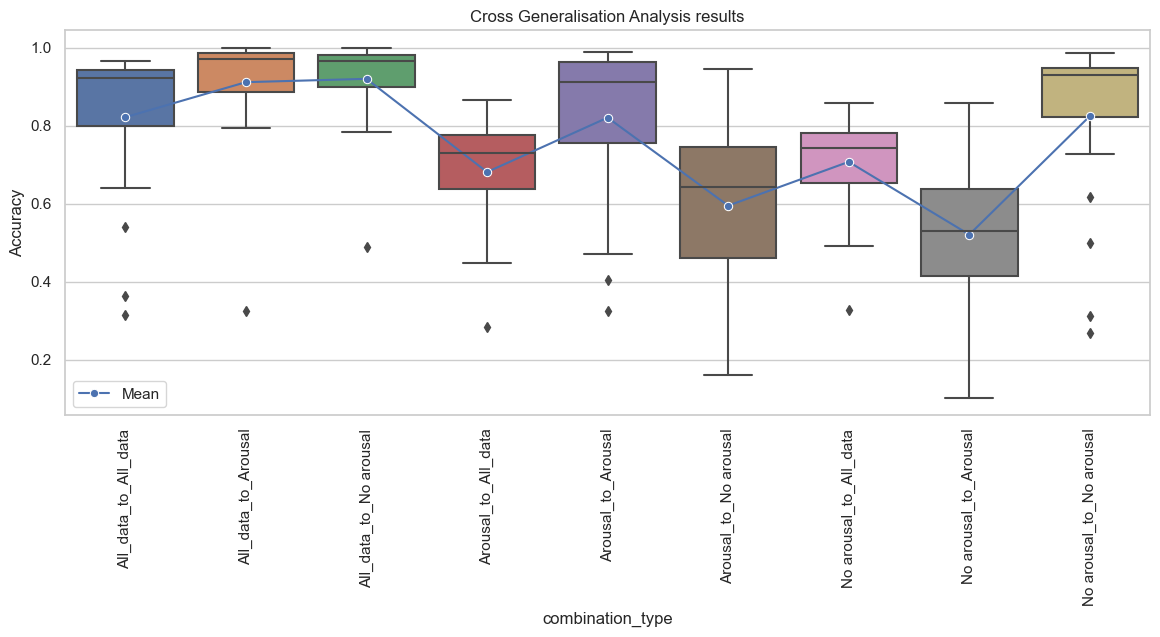

In [115]:
plt.figure(figsize=(14, 5))
sns.boxplot(x="combination_type", y="Accuracy", data=metrics_df_all,showfliers=True)
sns.lineplot(x='combination_type', y='Accuracy', data=grouped_metrics_df, marker='o',label='Mean')
plt.xticks(rotation=90) 
plt.title('Cross Generalisation Analysis results')
plt.show()